# Data Import and Exploration

### Import the Necessary Libraries

In [3]:
import pandas as pd 
from scipy import stats  # scipy.stats module provides various statistical functions and tools.
import numpy as np # Numerical Python
import seaborn as sns #for data visualization
from sklearn.preprocessing import MinMaxScaler # used to scale functions to a specified range, usually between 0 and 1.
import matplotlib.pyplot as plt #for data visualization

### Load the Dataset

In [4]:
df = pd.read_csv(r'C:\Users\HP\Downloads\city_temperature.csv',dtype={'State': str})

### First View of Dataset
As a first step, we looked at the first few rows of the data set. This usually helps to get a general understanding of the data.

In [5]:
print(df.head())

   Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9


### Summary Statistics
<p>---> describe()statistical data on columns were obtained through the method: average(mean),standard deviation(std), minimum and maximum values(min and max).</p>
<p>---> info()method returns data types of columns and null (NaN) values.</p>

In [6]:
# Display summary statistics
print(df.describe())

# Display information about the dataset
print(df.info(memory_usage='deep'))

              Month           Day          Year  AvgTemperature
count  2.906327e+06  2.906327e+06  2.906327e+06    2.906327e+06
mean   6.469163e+00  1.571682e+01  2.006624e+03    5.600492e+01
std    3.456489e+00  8.800534e+00  2.338226e+01    3.212359e+01
min    1.000000e+00  0.000000e+00  2.000000e+02   -9.900000e+01
25%    3.000000e+00  8.000000e+00  2.001000e+03    4.580000e+01
50%    6.000000e+00  1.600000e+01  2.007000e+03    6.250000e+01
75%    9.000000e+00  2.300000e+01  2.013000e+03    7.550000e+01
max    1.200000e+01  3.100000e+01  2.020000e+03    1.100000e+02
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), in

### Distribution of Key Variables
A histogram was created for the average temperature distribution.

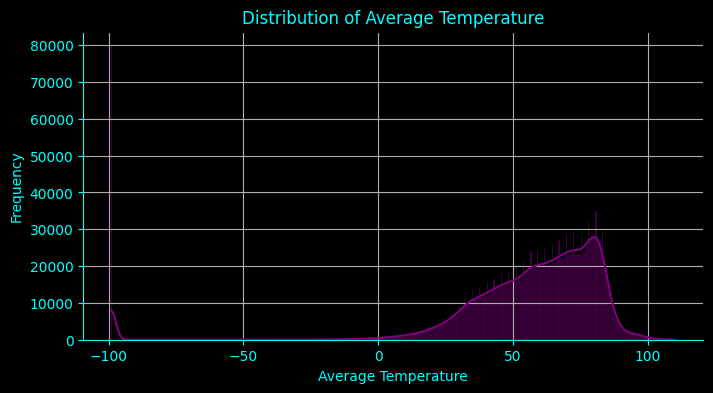

In [7]:
# Plot the distribution of temperature
plt.figure(figsize=(8,4))
sns.histplot(df['AvgTemperature'], kde=True,color='purple')
plt.title('Distribution of Average Temperature', color='cyan')
plt.xlabel('Average Temperature', color='cyan')
plt.ylabel('Frequency', color='cyan')
plt.gca().tick_params(axis='x', colors='cyan')  # X-axis ticks color
plt.gca().tick_params(axis='y', colors='cyan')  # Y-axis ticks color
plt.gca().set_facecolor('black')  
plt.gcf().set_facecolor('black')
plt.gca().spines['bottom'].set_color('cyan')  # X-axis color
plt.gca().spines['left'].set_color('cyan')    # Y-axis color
plt.grid(True)
plt.show()


### Certain Patterns and Trends 
The average temperature trend over the years for different regions was shown.

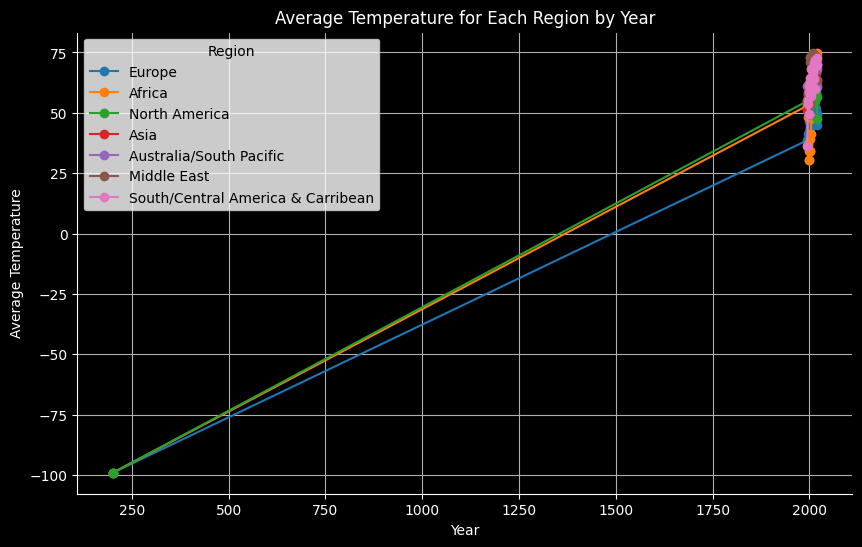

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by years and regions and calculate average temperatures
grouped_df = df.groupby(['Year', 'Region'])['AvgTemperature'].mean().reset_index()

plt.figure(figsize=(10,6))

# It circulates in unique regions
for region in grouped_df['Region'].unique():
    subset = grouped_df[grouped_df['Region'] == region]
    plt.plot(subset['Year'], subset['AvgTemperature'], marker='o', label=region)

plt.title('Average Temperature for Each Region by Year',color="white")
plt.xlabel('Year',color="white")
plt.ylabel('Average Temperature',color="white")
plt.gca().tick_params(axis='x', colors='white')  # X-axis ticks color
plt.gca().tick_params(axis='y', colors='white')  # Y-axis ticks color
plt.gca().set_facecolor('black')  
plt.gcf().set_facecolor('black')
plt.gca().spines['bottom'].set_color('white')  # X-axis color
plt.gca().spines['left'].set_color('white')    # Y-axis color
plt.legend(title='Region')
plt.grid(True)
plt.show()


In [9]:
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


### Correlation Between Variables
A heat map was created to identify relationships (correlations) between variables.

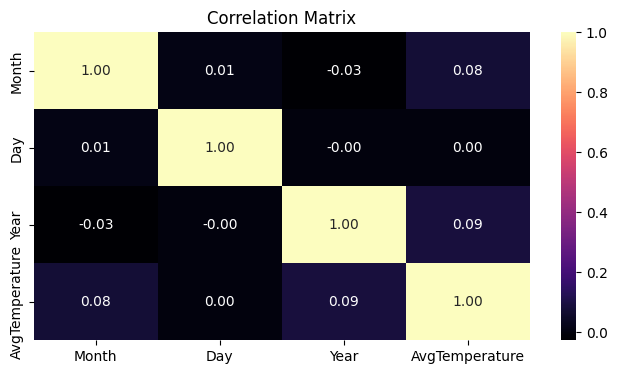

In [10]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_df.corr()

# To create a heat map of the correlation matrix
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [11]:
df['Country'].unique()

array(['Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo',
       'Egypt', 'Ethiopia', 'Gabon', 'Gambia', 'Guinea', 'Guinea-Bissau',
       'Ivory Coast', 'Kenya', 'Morocco', 'Madagascar', 'Mauritania',
       'Malawi', 'Mozambique', 'Namibia', 'Nigeria', 'Senegal',
       'Sierra Leone', 'South Africa', 'Togo', 'Tunisia', 'Tanzania',
       'Uganda', 'Zambia', 'Bangladesh', 'China', 'Hong Kong', 'India',
       'Indonesia', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
       'Malaysia', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea',
       'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka',
       'Taiwan', 'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan',
       'Vietnam', 'Australia', 'New Zealand', 'Albania', 'Austria',
       'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Ma

# Data Cleaning and Preprocessing
Clean the data by handling missing values, correcting errors, and formatting the data appropriately.

In [12]:
print(df.dtypes)

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object


In [13]:
filtered_df = df[(df['Country'] == 'Sierra Leone') & (df['City'] == 'Freetown')]
filtered_df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
191588,Africa,Sierra Leone,NaN,Freetown,1,1,1995,-99.0
191589,Africa,Sierra Leone,NaN,Freetown,1,2,1995,-99.0
191590,Africa,Sierra Leone,NaN,Freetown,1,3,1995,-99.0
191591,Africa,Sierra Leone,NaN,Freetown,1,4,1995,-99.0
191592,Africa,Sierra Leone,NaN,Freetown,1,5,1995,-99.0
...,...,...,...,...,...,...,...,...
197792,Africa,Sierra Leone,NaN,Freetown,12,27,2011,82.8
197793,Africa,Sierra Leone,NaN,Freetown,12,28,2011,-99.0
197794,Africa,Sierra Leone,NaN,Freetown,12,29,2011,81.9
197795,Africa,Sierra Leone,NaN,Freetown,12,30,2011,-99.0


In [14]:
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


##### Format the Historical Data
Let's create a full date column by concatenating date-related columns and this column to datetime convert

In [15]:
def is_valid_date(year, month, day):
    try:
        pd.Timestamp(year=year, month=month, day=day)
        return True
    except ValueError:
        return False

In [16]:
# Apply the validation function
df['Valid'] = df.apply(lambda row: is_valid_date(row['Year'], row['Month'], row['Day']), axis=1)

In [17]:
# Filter out invalid rows
df_cleaned = df[df['Valid']].drop(columns=['Valid'])

In [18]:
# Convert to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned[['Year', 'Month', 'Day']], errors='coerce', format='%Y-%m-%d')

In [19]:
# Optional: Drop rows where date conversion resulted in NaT
df_cleaned = df_cleaned.dropna(subset=['date'])

In [20]:
df_cleaned

,Region,Country,State,City,Month,Day,Year,AvgTemperature,date
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,1995-01-01
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,1995-01-02
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,1995-01-03
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,1995-01-04
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,1995-01-05
...,...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4,2013-07-27
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6,2013-07-28
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2,2013-07-29
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8,2013-07-30


In [21]:
df_cleaned.drop(columns=['State','Year','Month','Day'],axis=1,inplace=True)

In [22]:
df_cleaned

,Region,Country,City,AvgTemperature,date
0,Africa,Algeria,Algiers,64.2,1995-01-01
1,Africa,Algeria,Algiers,49.4,1995-01-02
2,Africa,Algeria,Algiers,48.8,1995-01-03
3,Africa,Algeria,Algiers,46.4,1995-01-04
4,Africa,Algeria,Algiers,47.9,1995-01-05
...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,82.4,2013-07-27
2906323,North America,US,San Juan Puerto Rico,81.6,2013-07-28
2906324,North America,US,San Juan Puerto Rico,84.2,2013-07-29
2906325,North America,US,San Juan Puerto Rico,83.8,2013-07-30


In [23]:
print(df_cleaned.isnull().sum())

Region            0
Country           0
City              0
AvgTemperature    0
date              0
dtype: int64


In [24]:
df_cleaned.columns = df_cleaned.columns.str.strip()

In [25]:
df_cleaned[df_cleaned.duplicated()==True]

,Region,Country,City,AvgTemperature,date
111976,Africa,Kenya,Nairobi,-99.0,2011-02-03
111977,Africa,Kenya,Nairobi,-99.0,2011-02-04
111978,Africa,Kenya,Nairobi,-99.0,2011-02-05
111979,Africa,Kenya,Nairobi,-99.0,2011-02-06
111980,Africa,Kenya,Nairobi,-99.0,2011-02-07
...,...,...,...,...,...
2841036,North America,US,Charleston,67.9,2012-05-22
2841063,North America,US,Charleston,73.2,2012-06-18
2841358,North America,US,Charleston,69.8,2013-04-09
2841701,North America,US,Charleston,42.8,2014-03-18


In [26]:
df_cleaned[(df_cleaned['Country']=='Kenya') & (df_cleaned['City']=='Nairobi') & (df_cleaned['AvgTemperature']==-99.0) & (df_cleaned['date']=='2011-02-07')]

,Region,Country,City,AvgTemperature,date
110552,Africa,Kenya,Nairobi,-99.0,2011-02-07
111980,Africa,Kenya,Nairobi,-99.0,2011-02-07


In [27]:
df_cleaned[df_cleaned['Region']=='Asia']

,Region,Country,City,AvgTemperature,date
251118,Asia,Bangladesh,Dhaka,64.8,1995-01-01
251119,Asia,Bangladesh,Dhaka,58.4,1995-01-02
251120,Asia,Bangladesh,Dhaka,-99.0,1995-01-03
251121,Asia,Bangladesh,Dhaka,59.6,1995-01-04
251122,Asia,Bangladesh,Dhaka,64.9,1995-01-05
...,...,...,...,...,...
567776,Asia,Vietnam,Hanoi,84.1,2020-05-09
567777,Asia,Vietnam,Hanoi,87.0,2020-05-10
567778,Asia,Vietnam,Hanoi,84.5,2020-05-11
567779,Asia,Vietnam,Hanoi,80.9,2020-05-12


In [28]:
df_cleaned=df_cleaned.drop_duplicates()

In [29]:
df_cleaned

,Region,Country,City,AvgTemperature,date
0,Africa,Algeria,Algiers,64.2,1995-01-01
1,Africa,Algeria,Algiers,49.4,1995-01-02
2,Africa,Algeria,Algiers,48.8,1995-01-03
3,Africa,Algeria,Algiers,46.4,1995-01-04
4,Africa,Algeria,Algiers,47.9,1995-01-05
...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,82.4,2013-07-27
2906323,North America,US,San Juan Puerto Rico,81.6,2013-07-28
2906324,North America,US,San Juan Puerto Rico,84.2,2013-07-29
2906325,North America,US,San Juan Puerto Rico,83.8,2013-07-30


Missing Data: Use techniques such as mean/mode/median imputation, forward/backward fill, or simply remove rows/columns with excessive missing data.

In [30]:
# We create a copy of the dataset
df_copy = df_cleaned.copy()

# We find the biggest year
max_year = df_copy['date'].dt.year.max()

# A list is created to create a new DataFrame
new_rows_list = []

# We get the current years and countries
countries = df_copy['Country'].unique()

In [31]:
for country in countries:
    # We get the cities for each country
    cities = df_copy[df_copy['Country'] == country]['City'].unique()
    
    for city in cities:
        # We get the data for the city
        city_country_df = df_copy[(df_copy['Country'] == country) & (df_copy['City'] == city)]
        
        # We find the years of the city
        city_years = sorted(city_country_df['date'].dt.year.unique())
        
        # We find the biggest year
        max_city_year = city_country_df['date'].dt.year.max()
        
        # We find the missing years
        missing_years = set(range(max_city_year + 1, max_year + 1))
        
        # Calculate the average of at most `n` years
        city_data = city_country_df[['date', 'AvgTemperature']].copy()
        city_data['year'] = city_data['date'].dt.year
        city_data.set_index('year', inplace=True)

        n = max_year - max_city_year
        for year in missing_years:
            recent_years = [y for y in city_years if y < year]
            if recent_years:
                # Calculate the average of the last `n` years
                recent_years = sorted(recent_years)[-n:]
                avg_temp = city_data.loc[recent_years, 'AvgTemperature'].mean()
            else:
                avg_temp = np.nan
            
            # We add all the days
            for month in range(1, 13):
                for day in range(1, 32):
                    try:
                        new_date = pd.Timestamp(f'{year}-{month:02d}-{day:02d}')
                        new_row = {
                            'Region': city_country_df['Region'].iloc[0] if not city_country_df.empty else np.nan,
                            'Country': country,
                            'City': city,
                            'AvgTemperature': avg_temp,
                            'date': new_date,
                            'Season': np.nan,
                            'CO2': np.nan
                        }
                        new_rows_list.append(new_row)
                    except ValueError:
                        continue


In [32]:
# We convert `new_rows_list` to a DataFrame
expanded_df = pd.DataFrame(new_rows_list)

# We add the newly created rows to the initial dataset
df_copy = pd.concat([df_copy, expanded_df]).reset_index(drop=True)

# Sort by date
df_copy = df_copy.sort_values(by=['Country', 'City', 'date']).reset_index(drop=True)

# As an example, we print a few lines to check
print(df_copy.head())
print(df_copy.tail())

   Region  Country    City  AvgTemperature       date  Season  CO2
0  Europe  Albania  Tirana           -99.0 1995-01-01     NaN  NaN
1  Europe  Albania  Tirana           -99.0 1995-01-02     NaN  NaN
2  Europe  Albania  Tirana           -99.0 1995-01-03     NaN  NaN
3  Europe  Albania  Tirana           -99.0 1995-01-04     NaN  NaN
4  Europe  Albania  Tirana           -99.0 1995-01-05     NaN  NaN
         Region Country    City  AvgTemperature       date  Season  CO2
3007704  Africa  Zambia  Lusaka       58.811364 2020-12-27     NaN  NaN
3007705  Africa  Zambia  Lusaka       58.811364 2020-12-28     NaN  NaN
3007706  Africa  Zambia  Lusaka       58.811364 2020-12-29     NaN  NaN
3007707  Africa  Zambia  Lusaka       58.811364 2020-12-30     NaN  NaN
3007708  Africa  Zambia  Lusaka       58.811364 2020-12-31     NaN  NaN


In [33]:
df_copy[df_copy.duplicated()==True]

,Region,Country,City,AvgTemperature,date,Season,CO2


In [34]:
df_copy.drop_duplicates()

,Region,Country,City,AvgTemperature,date,Season,CO2
0,Europe,Albania,Tirana,-99.000000,1995-01-01,NaN,NaN
1,Europe,Albania,Tirana,-99.000000,1995-01-02,NaN,NaN
2,Europe,Albania,Tirana,-99.000000,1995-01-03,NaN,NaN
3,Europe,Albania,Tirana,-99.000000,1995-01-04,NaN,NaN
4,Europe,Albania,Tirana,-99.000000,1995-01-05,NaN,NaN
...,...,...,...,...,...,...,...
3007704,Africa,Zambia,Lusaka,58.811364,2020-12-27,NaN,NaN
3007705,Africa,Zambia,Lusaka,58.811364,2020-12-28,NaN,NaN
3007706,Africa,Zambia,Lusaka,58.811364,2020-12-29,NaN,NaN
3007707,Africa,Zambia,Lusaka,58.811364,2020-12-30,NaN,NaN


In [35]:
df_copy['City'].unique()

array(['Tirana', 'Algiers', 'Buenos Aires', 'Brisbane', 'Canberra',
       'Melbourne', 'Perth', 'Sydney', 'Vienna', 'Nassau', 'Manama',
       'Dhaka', 'Bridgetown', 'Minsk', 'Brussels', 'Belize City',
       'Cotonou', 'Hamilton', 'La Paz', 'Brasilia', 'Rio de Janeiro',
       'Sao Paulo', 'Sofia', 'Bujumbura', 'Calgary', 'Edmonton',
       'Halifax', 'Montreal', 'Ottawa', 'Quebec', 'Regina', 'Toronto',
       'Vancouver', 'Winnipeg', 'Bangui', 'Beijing', 'Chengdu',
       'Guangzhou', 'Shanghai', 'Shenyang', 'Bogota', 'Brazzaville',
       'San Jose', 'Zagreb', 'Havana', 'Nicosia', 'Prague', 'Copenhagen',
       'Santo Domingo', 'Cairo', 'Guayaquil', 'Quito', 'Addis Ababa',
       'Helsinki', 'Bordeaux', 'Paris', 'Libreville', 'Banjul', 'Tbilisi',
       'Bonn', 'Frankfurt', 'Hamburg', 'Munich', 'Athens',
       'Guatemala City', 'Conakry', 'Bissau', 'Georgetown',
       'Port au Prince', 'Tegucigalpa', 'Hong Kong', 'Budapest',
       'Reykjavik', 'Bombay (Mumbai)', 'Calcutta', 'Che

In [36]:
df_cleaned[(df_cleaned['City']=='Edmonton') & (df_cleaned['date'].dt.year==2020)]

,Region,Country,City,AvgTemperature,date


In [37]:
df_copy[(df_copy['City']=='Edmonton') & (df_copy['date'].dt.year==2020)]

,Region,Country,City,AvgTemperature,date,Season,CO2
240856,North America,Canada,Edmonton,38.642268,2020-01-01,NaN,NaN
240857,North America,Canada,Edmonton,38.642268,2020-01-02,NaN,NaN
240858,North America,Canada,Edmonton,38.642268,2020-01-03,NaN,NaN
240859,North America,Canada,Edmonton,38.642268,2020-01-04,NaN,NaN
240860,North America,Canada,Edmonton,38.642268,2020-01-05,NaN,NaN
...,...,...,...,...,...,...,...
241217,North America,Canada,Edmonton,38.642268,2020-12-27,NaN,NaN
241218,North America,Canada,Edmonton,38.642268,2020-12-28,NaN,NaN
241219,North America,Canada,Edmonton,38.642268,2020-12-29,NaN,NaN
241220,North America,Canada,Edmonton,38.642268,2020-12-30,NaN,NaN


#### Added a new column

In [38]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'


In [39]:
last_df=df_copy.copy()

In [40]:
last_df['Season'] = last_df['date'].dt.month.apply(get_season)

In [41]:
last_df

,Region,Country,City,AvgTemperature,date,Season,CO2
0,Europe,Albania,Tirana,-99.000000,1995-01-01,Winter,NaN
1,Europe,Albania,Tirana,-99.000000,1995-01-02,Winter,NaN
2,Europe,Albania,Tirana,-99.000000,1995-01-03,Winter,NaN
3,Europe,Albania,Tirana,-99.000000,1995-01-04,Winter,NaN
4,Europe,Albania,Tirana,-99.000000,1995-01-05,Winter,NaN
...,...,...,...,...,...,...,...
3007704,Africa,Zambia,Lusaka,58.811364,2020-12-27,Winter,NaN
3007705,Africa,Zambia,Lusaka,58.811364,2020-12-28,Winter,NaN
3007706,Africa,Zambia,Lusaka,58.811364,2020-12-29,Winter,NaN
3007707,Africa,Zambia,Lusaka,58.811364,2020-12-30,Winter,NaN


#### Merged with another dataset and created new column

##### CO2 

In [42]:
# Upload your new dataset
new_data = pd.read_csv('CO2_Emissions_1960-2018.csv')

# Check the column names
print(new_data.columns)

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')


In [43]:
# Extract the year of a date in an existing dataset
last_df['year'] = pd.to_datetime(last_df['date']).dt.year

In [44]:
# Convert the `year` column in the existing dataset to type int
last_df['year'] = last_df['year'].astype(int)

In [45]:
last_df.dtypes

Region                    object
Country                   object
City                      object
AvgTemperature           float64
date              datetime64[ns]
Season                    object
CO2                      float64
year                       int64
dtype: object

In [46]:
# Label the Country column with the correct name
new_data_long = new_data.melt(id_vars='Country Name', var_name='year', value_name='CO2')

In [47]:
# Convert year column to int32 in existing dataset
last_df['year'] = last_df['year'].astype(int)

# In the new dataset, convert the year column to int32
new_data_long['year'] = new_data_long['year'].astype(int)

# Merge between two datasets
merged_data = pd.merge(last_df, new_data_long, left_on=['Country', 'year'], right_on=['Country Name', 'year'], how='inner')

# You can delete unnecessary columns
merged_data.drop(columns=['Country Name'], inplace=True)

merged_data


,Region,Country,City,AvgTemperature,date,Season,CO2_x,year,CO2_y
0,Europe,Albania,Tirana,-99.000000,1995-01-01,Winter,NaN,1995,0.611710
1,Europe,Albania,Tirana,-99.000000,1995-01-02,Winter,NaN,1995,0.611710
2,Europe,Albania,Tirana,-99.000000,1995-01-03,Winter,NaN,1995,0.611710
3,Europe,Albania,Tirana,-99.000000,1995-01-04,Winter,NaN,1995,0.611710
4,Europe,Albania,Tirana,-99.000000,1995-01-05,Winter,NaN,1995,0.611710
...,...,...,...,...,...,...,...,...,...
1253364,Africa,Zambia,Lusaka,58.811364,2018-12-27,Winter,NaN,2018,0.446065
1253365,Africa,Zambia,Lusaka,58.811364,2018-12-28,Winter,NaN,2018,0.446065
1253366,Africa,Zambia,Lusaka,58.811364,2018-12-29,Winter,NaN,2018,0.446065
1253367,Africa,Zambia,Lusaka,58.811364,2018-12-30,Winter,NaN,2018,0.446065


In [48]:
merged_data.isnull().sum()

Region                  0
Country                 0
City                    0
AvgTemperature          0
date                    0
Season                  0
CO2_x             1253369
year                    0
CO2_y                8635
dtype: int64

In [49]:
merged_data=merged_data.drop(columns=['CO2_x'])

In [50]:
Df_merged=merged_data.copy()

##### Population Density

In [51]:
# Upload your new dataset
new_data2 = pd.read_csv('world_population_data_1955-2024.csv')  

# Check the column names
print(new_data2.columns)

# In the new dataset, convert the Year column to int32
new_data2['Year'] = new_data2['Year'].astype(int)

Df_merged.rename(columns={'year':'Year'},inplace=True)
new_data2.rename(columns={'Density (P/Km?)':'Density'},inplace=True)
# Merge between two datasets - only on the Year column
Df_merged = pd.merge(Df_merged, new_data2[['Year', 'Density']], on='Year', how='left')

# Check the result
print(Df_merged)
Df_merged.drop(columns='Year',inplace=True)

Index(['Year', 'Population', 'Yearly % Change', 'Yearly Change', 'Median Age',
       'Fertility Rate', 'Density (P/Km?)'],
      dtype='object')
         Region  Country    City  AvgTemperature       date  Season  Year  \
0        Europe  Albania  Tirana      -99.000000 1995-01-01  Winter  1995   
1        Europe  Albania  Tirana      -99.000000 1995-01-02  Winter  1995   
2        Europe  Albania  Tirana      -99.000000 1995-01-03  Winter  1995   
3        Europe  Albania  Tirana      -99.000000 1995-01-04  Winter  1995   
4        Europe  Albania  Tirana      -99.000000 1995-01-05  Winter  1995   
...         ...      ...     ...             ...        ...     ...   ...   
1253364  Africa   Zambia  Lusaka       58.811364 2018-12-27  Winter  2018   
1253365  Africa   Zambia  Lusaka       58.811364 2018-12-28  Winter  2018   
1253366  Africa   Zambia  Lusaka       58.811364 2018-12-29  Winter  2018   
1253367  Africa   Zambia  Lusaka       58.811364 2018-12-30  Winter  2018   
1253368

Delete null lines

In [52]:
Df_merged=Df_merged.dropna()
merged_data=merged_data.dropna()

Change the column name

In [53]:
merged_data=merged_data.rename(columns={'date':'Date'})

In [54]:
merged_data

,Region,Country,City,AvgTemperature,Date,Season,year,CO2_y
0,Europe,Albania,Tirana,-99.000000,1995-01-01,Winter,1995,0.611710
1,Europe,Albania,Tirana,-99.000000,1995-01-02,Winter,1995,0.611710
2,Europe,Albania,Tirana,-99.000000,1995-01-03,Winter,1995,0.611710
3,Europe,Albania,Tirana,-99.000000,1995-01-04,Winter,1995,0.611710
4,Europe,Albania,Tirana,-99.000000,1995-01-05,Winter,1995,0.611710
...,...,...,...,...,...,...,...,...
1253364,Africa,Zambia,Lusaka,58.811364,2018-12-27,Winter,2018,0.446065
1253365,Africa,Zambia,Lusaka,58.811364,2018-12-28,Winter,2018,0.446065
1253366,Africa,Zambia,Lusaka,58.811364,2018-12-29,Winter,2018,0.446065
1253367,Africa,Zambia,Lusaka,58.811364,2018-12-30,Winter,2018,0.446065


Apply filters and check the results of our applications

In [55]:
merged_data[merged_data['Country']=='Algeria']

,Region,Country,City,AvgTemperature,Date,Season,year,CO2_y
8767,Africa,Algeria,Algiers,64.2,1995-01-01,Winter,1995,2.540181
8768,Africa,Algeria,Algiers,49.4,1995-01-02,Winter,1995,2.540181
8769,Africa,Algeria,Algiers,48.8,1995-01-03,Winter,1995,2.540181
8770,Africa,Algeria,Algiers,46.4,1995-01-04,Winter,1995,2.540181
8771,Africa,Algeria,Algiers,47.9,1995-01-05,Winter,1995,2.540181
...,...,...,...,...,...,...,...,...
17529,Africa,Algeria,Algiers,50.6,2018-12-27,Winter,2018,3.591657
17530,Africa,Algeria,Algiers,55.9,2018-12-28,Winter,2018,3.591657
17531,Africa,Algeria,Algiers,51.9,2018-12-29,Winter,2018,3.591657
17532,Africa,Algeria,Algiers,49.2,2018-12-30,Winter,2018,3.591657


In [56]:
merged_data[(merged_data['City']=='Edmonton') & (merged_data['Date'].dt.year==2018)]

,Region,Country,City,AvgTemperature,Date,Season,year,CO2_y
217729,North America,Canada,Edmonton,38.642268,2018-01-01,Winter,2018,15.497025
217730,North America,Canada,Edmonton,38.642268,2018-01-02,Winter,2018,15.497025
217731,North America,Canada,Edmonton,38.642268,2018-01-03,Winter,2018,15.497025
217732,North America,Canada,Edmonton,38.642268,2018-01-04,Winter,2018,15.497025
217733,North America,Canada,Edmonton,38.642268,2018-01-05,Winter,2018,15.497025
...,...,...,...,...,...,...,...,...
218089,North America,Canada,Edmonton,38.642268,2018-12-27,Winter,2018,15.497025
218090,North America,Canada,Edmonton,38.642268,2018-12-28,Winter,2018,15.497025
218091,North America,Canada,Edmonton,38.642268,2018-12-29,Winter,2018,15.497025
218092,North America,Canada,Edmonton,38.642268,2018-12-30,Winter,2018,15.497025


#### Change to Celsius from Fahrenheit

In [57]:
# Fahrenheit to Celsius conversion function
def fahrenheit_to_celsius(f):
    return (f - 32) / 1.8

# Convert `AvgTemperature` column to Celsius
merged_data['AvgTemperature'] = merged_data['AvgTemperature'].apply(fahrenheit_to_celsius)

# Let's print the first few lines of the DataFrame to test it
print(merged_data.head())

   Region  Country    City  AvgTemperature       Date  Season  year    CO2_y
0  Europe  Albania  Tirana      -72.777778 1995-01-01  Winter  1995  0.61171
1  Europe  Albania  Tirana      -72.777778 1995-01-02  Winter  1995  0.61171
2  Europe  Albania  Tirana      -72.777778 1995-01-03  Winter  1995  0.61171
3  Europe  Albania  Tirana      -72.777778 1995-01-04  Winter  1995  0.61171
4  Europe  Albania  Tirana      -72.777778 1995-01-05  Winter  1995  0.61171


In [58]:
merged_data

,Region,Country,City,AvgTemperature,Date,Season,year,CO2_y
0,Europe,Albania,Tirana,-72.777778,1995-01-01,Winter,1995,0.611710
1,Europe,Albania,Tirana,-72.777778,1995-01-02,Winter,1995,0.611710
2,Europe,Albania,Tirana,-72.777778,1995-01-03,Winter,1995,0.611710
3,Europe,Albania,Tirana,-72.777778,1995-01-04,Winter,1995,0.611710
4,Europe,Albania,Tirana,-72.777778,1995-01-05,Winter,1995,0.611710
...,...,...,...,...,...,...,...,...
1253364,Africa,Zambia,Lusaka,14.895202,2018-12-27,Winter,2018,0.446065
1253365,Africa,Zambia,Lusaka,14.895202,2018-12-28,Winter,2018,0.446065
1253366,Africa,Zambia,Lusaka,14.895202,2018-12-29,Winter,2018,0.446065
1253367,Africa,Zambia,Lusaka,14.895202,2018-12-30,Winter,2018,0.446065


#### Outliers: 
Detect and handle outliers using methods like z-scores, IQR, or domain-specific thresholds.

In [59]:
Q1 = merged_data['AvgTemperature'].quantile(0.25)
Q3 = merged_data['AvgTemperature'].quantile(0.75)
IQR = Q3 - Q1

# Limits for defining endpoints
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print limits
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

Lower Bound: -16.972222222222218
Upper Bound: 50.80555555555556


#### Data Transformation
<p>--- It is not very appropriate to convert categorical variables into numerical variables, because for example, there are many unique values ​​in the Country column, and it is not appropriate to open a separate column for each of them and write them with 0s and 1s.</p>
<p>--- If CO2 you have a column with normalized values ​​between 0 and 1, you can consider the following benefits and considerations to understand how this will affect the dataset</p>

In [60]:
merged_data.rename(columns={'CO2_y':'CO2'},inplace=True)

In [61]:
merged_data['CO2'].dtype

dtype('float64')

In [62]:
merged_data_copy=merged_data.copy()

In [63]:
# Normalization of CO2 values ​​to the range 0-1
scaler = MinMaxScaler()
merged_data_copy['CO2'] = scaler.fit_transform(merged_data_copy[['CO2']])

In [64]:
scaler = MinMaxScaler()
merged_data_copy['AvgTemperature'] = scaler.fit_transform(merged_data_copy[['AvgTemperature']])

In [65]:
Df_merged

,Region,Country,City,AvgTemperature,date,Season,CO2_y,Density
0,Europe,Albania,Tirana,-99.000000,1995-01-01,Winter,0.611710,39.0
1,Europe,Albania,Tirana,-99.000000,1995-01-02,Winter,0.611710,39.0
2,Europe,Albania,Tirana,-99.000000,1995-01-03,Winter,0.611710,39.0
3,Europe,Albania,Tirana,-99.000000,1995-01-04,Winter,0.611710,39.0
4,Europe,Albania,Tirana,-99.000000,1995-01-05,Winter,0.611710,39.0
...,...,...,...,...,...,...,...,...
1252268,Africa,Zambia,Lusaka,58.811364,2015-12-27,Winter,0.319282,50.0
1252269,Africa,Zambia,Lusaka,58.811364,2015-12-28,Winter,0.319282,50.0
1252270,Africa,Zambia,Lusaka,58.811364,2015-12-29,Winter,0.319282,50.0
1252271,Africa,Zambia,Lusaka,58.811364,2015-12-30,Winter,0.319282,50.0


In [66]:
Df_merged_copy=Df_merged.copy()

In [67]:
scaler = MinMaxScaler()
Df_merged_copy['CO2_y'] = scaler.fit_transform(Df_merged_copy[['CO2_y']])
scaler = MinMaxScaler()
Df_merged_copy['AvgTemperature'] = scaler.fit_transform(Df_merged_copy[['AvgTemperature']])
scaler = MinMaxScaler()
Df_merged_copy['Density'] = scaler.fit_transform(Df_merged_copy[['Density']])

In [68]:
merged_data

,Region,Country,City,AvgTemperature,Date,Season,year,CO2
0,Europe,Albania,Tirana,-72.777778,1995-01-01,Winter,1995,0.611710
1,Europe,Albania,Tirana,-72.777778,1995-01-02,Winter,1995,0.611710
2,Europe,Albania,Tirana,-72.777778,1995-01-03,Winter,1995,0.611710
3,Europe,Albania,Tirana,-72.777778,1995-01-04,Winter,1995,0.611710
4,Europe,Albania,Tirana,-72.777778,1995-01-05,Winter,1995,0.611710
...,...,...,...,...,...,...,...,...
1253364,Africa,Zambia,Lusaka,14.895202,2018-12-27,Winter,2018,0.446065
1253365,Africa,Zambia,Lusaka,14.895202,2018-12-28,Winter,2018,0.446065
1253366,Africa,Zambia,Lusaka,14.895202,2018-12-29,Winter,2018,0.446065
1253367,Africa,Zambia,Lusaka,14.895202,2018-12-30,Winter,2018,0.446065


In [69]:
merged_data.drop(columns='year',inplace=True)

In [70]:
merged_data

,Region,Country,City,AvgTemperature,Date,Season,CO2
0,Europe,Albania,Tirana,-72.777778,1995-01-01,Winter,0.611710
1,Europe,Albania,Tirana,-72.777778,1995-01-02,Winter,0.611710
2,Europe,Albania,Tirana,-72.777778,1995-01-03,Winter,0.611710
3,Europe,Albania,Tirana,-72.777778,1995-01-04,Winter,0.611710
4,Europe,Albania,Tirana,-72.777778,1995-01-05,Winter,0.611710
...,...,...,...,...,...,...,...
1253364,Africa,Zambia,Lusaka,14.895202,2018-12-27,Winter,0.446065
1253365,Africa,Zambia,Lusaka,14.895202,2018-12-28,Winter,0.446065
1253366,Africa,Zambia,Lusaka,14.895202,2018-12-29,Winter,0.446065
1253367,Africa,Zambia,Lusaka,14.895202,2018-12-30,Winter,0.446065


##### At the end of these processes, we save the cleaned data in a new file for use in visualization

In [71]:
cleaned_file_path = r'C:\Users\HP\Downloads\Cleaned_City_Temperature.csv'
merged_data.to_csv(cleaned_file_path, index=False)

In [72]:
merged_data[merged_data['CO2']>1]

,Region,Country,City,AvgTemperature,Date,Season,CO2
1826,Europe,Albania,Tirana,-72.777778,2000-01-01,Winter,1.026213
1827,Europe,Albania,Tirana,1.000000,2000-01-02,Winter,1.026213
1828,Europe,Albania,Tirana,2.000000,2000-01-03,Winter,1.026213
1829,Europe,Albania,Tirana,2.500000,2000-01-04,Winter,1.026213
1830,Europe,Albania,Tirana,3.000000,2000-01-05,Winter,1.026213
...,...,...,...,...,...,...,...
1244941,Asia,Vietnam,Hanoi,21.444444,2018-12-27,Winter,2.698806
1244942,Asia,Vietnam,Hanoi,14.444444,2018-12-28,Winter,2.698806
1244943,Asia,Vietnam,Hanoi,11.611111,2018-12-29,Winter,2.698806
1244944,Asia,Vietnam,Hanoi,9.555556,2018-12-30,Winter,2.698806


# Data Analysis

In [73]:
merged_data_copy

,Region,Country,City,AvgTemperature,Date,Season,year,CO2
0,Europe,Albania,Tirana,0.000000,1995-01-01,Winter,1995,0.012374
1,Europe,Albania,Tirana,0.000000,1995-01-02,Winter,1995,0.012374
2,Europe,Albania,Tirana,0.000000,1995-01-03,Winter,1995,0.012374
3,Europe,Albania,Tirana,0.000000,1995-01-04,Winter,1995,0.012374
4,Europe,Albania,Tirana,0.000000,1995-01-05,Winter,1995,0.012374
...,...,...,...,...,...,...,...,...
1253364,Africa,Zambia,Lusaka,0.755078,2018-12-27,Winter,2018,0.008900
1253365,Africa,Zambia,Lusaka,0.755078,2018-12-28,Winter,2018,0.008900
1253366,Africa,Zambia,Lusaka,0.755078,2018-12-29,Winter,2018,0.008900
1253367,Africa,Zambia,Lusaka,0.755078,2018-12-30,Winter,2018,0.008900


In [74]:
merged_data_copy.drop(columns=["year"],inplace=True)

#### Descriptive Statistics Report
Summary statistics of the dataset (mean, median, standard deviation, etc.).

In [75]:
print(merged_data_copy.dtypes)

Region                    object
Country                   object
City                      object
AvgTemperature           float64
Date              datetime64[ns]
Season                    object
CO2                      float64
dtype: object


In [76]:
# Check for any non-numeric values
print(merged_data_copy[['AvgTemperature', 'CO2']].apply(pd.to_numeric, errors='coerce').isna().sum())


AvgTemperature    0
CO2               0
dtype: int64


In [77]:
# Filter out date columns by selecting only numerical columns
numerical_df = merged_data_copy.select_dtypes(include=['number'])

# Get basic descriptive statistics for numerical columns
descriptive_stats = numerical_df.describe()

# Display the descriptive statistics
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        AvgTemperature           CO2
count    1.244734e+06  1.244734e+06
mean     7.270858e-01  1.320419e-01
std      2.040316e-01  1.355750e-01
min      0.000000e+00  0.000000e+00
25%      6.995215e-01  2.692072e-02
50%      7.813397e-01  9.316099e-02
75%      8.454545e-01  1.883409e-01
max      1.000000e+00  1.000000e+00


#### Time Series Analysis Report

Analyzing trends over time, such as how average temperature and CO2 levels have changed year over year

Understanding Climate Change: By examining the trend in average temperatures, you can identify whether the climate is warming or cooling over the years. This can help in understanding the impact of climate change and inform climate policy and action.

Assessing Environmental Impact: Tracking CO2 levels over time helps in assessing the impact of human activities on greenhouse gas concentrations. Rising CO2 levels are often linked to increased industrial activity, deforestation, and other factors contributing to global warming

In [78]:
# Convert 'Date' column to datetime format
merged_data_copy['Date'] = pd.to_datetime(merged_data_copy['Date'])

# Analyze the trend in average temperature over the years
merged_data_copy['Year'] = merged_data_copy['Date'].dt.year
temperature_trend = merged_data_copy.groupby('Year')['AvgTemperature'].mean()

# Analyze the trend in CO2 levels over the years
co2_trend = merged_data_copy.groupby('Year')['CO2'].mean()

# Display the trends
print("Temperature Trend Over Time:\n", temperature_trend)
print("\nCO2 Levels Trend Over Time:\n", co2_trend)


Temperature Trend Over Time:
 Year
1995    0.685012
1996    0.699359
1997    0.696238
1998    0.676646
1999    0.699735
2000    0.698813
2001    0.719073
2002    0.708063
2003    0.713515
2004    0.717471
2005    0.733385
2006    0.730446
2007    0.744749
2008    0.740815
2009    0.753052
2010    0.741357
2011    0.746272
2012    0.748301
2013    0.752034
2014    0.746549
2015    0.751708
2016    0.750088
2017    0.752399
2018    0.746620
Name: AvgTemperature, dtype: float64

CO2 Levels Trend Over Time:
 Year
1995    0.127486
1996    0.129557
1997    0.129758
1998    0.131178
1999    0.130780
2000    0.130945
2001    0.132367
2002    0.133936
2003    0.136242
2004    0.136663
2005    0.138132
2006    0.137574
2007    0.141874
2008    0.139563
2009    0.134537
2010    0.131623
2011    0.131824
2012    0.132165
2013    0.130989
2014    0.124154
2015    0.127290
2016    0.127264
2017    0.126896
2018    0.126388
Name: CO2, dtype: float64


In [79]:
Df_merged_copy.rename(columns={'date':"Date",'CO2_y':"CO2"},inplace=True)
Df_merged.rename(columns={'date':"Date",'CO2_y':"CO2"},inplace=True)


In [80]:
Df_merged_copy

,Region,Country,City,AvgTemperature,Date,Season,CO2,Density
0,Europe,Albania,Tirana,0.00000,1995-01-01,Winter,0.012374,0.0
1,Europe,Albania,Tirana,0.00000,1995-01-02,Winter,0.012374,0.0
2,Europe,Albania,Tirana,0.00000,1995-01-03,Winter,0.012374,0.0
3,Europe,Albania,Tirana,0.00000,1995-01-04,Winter,0.012374,0.0
4,Europe,Albania,Tirana,0.00000,1995-01-05,Winter,0.012374,0.0
...,...,...,...,...,...,...,...,...
1252268,Africa,Zambia,Lusaka,0.75544,2015-12-27,Winter,0.006241,1.0
1252269,Africa,Zambia,Lusaka,0.75544,2015-12-28,Winter,0.006241,1.0
1252270,Africa,Zambia,Lusaka,0.75544,2015-12-29,Winter,0.006241,1.0
1252271,Africa,Zambia,Lusaka,0.75544,2015-12-30,Winter,0.006241,1.0


<p>Poll: What are the years with the highest CO2 emissions in each region?</p>
<p>Scope: This survey can be used to analyze the economic and industrial activities in those years by identifying the years with the highest carbon emissions in the regions.</p>

In [81]:
max_co2_years = merged_data_copy.loc[merged_data_copy.groupby('Region')['CO2'].idxmax()][['Region', 'Date', 'CO2']]
max_co2_years

,Region,Date,CO2
1013020,Africa,2008-01-01,0.179270
695237,Asia,2013-01-01,0.315147
30684,Australia/South Pacific,2007-01-01,0.387622
392447,Europe,1996-01-01,0.291653
950557,Middle East,2005-01-01,1.000000
205424,North America,2007-01-01,0.363879
101516,South/Central America & Carribean,2009-01-01,0.344252


2. Causes and Effects of Growth

Reasons for the increase:
<p>Urbanization and Economic Development: Growth can be related to urbanization, economic development, and increased population density as a result of urbanization. In this period, factors such as development of new infrastructures, increase in economic opportunities and migration from rural to urban areas can increase the population density.</p>
<p>Demographic Changes: Other demographic changes affecting population growth must also be considered. For example, increasing birth rates and decreasing death rates can increase population density.</p>

Effects:
<p>Infrastructure and Resource Requirements: Increasing population density can lead to increased infrastructure and resource requirements. This may bring additional demands for urban planning and improved services.</p>
<p>Environmental Effects: Increasing population density can affect the environment. This can result in increased air quality, water demands and other environmental factors.</p>

In [82]:
# Calculate the average value of population density by year
annual_mean_density = Df_merged.groupby(Df_merged['Date'].dt.year)['Density'].mean().reset_index()
annual_mean_density.columns = ['Year', 'Average Density']

print(annual_mean_density)


   Year  Average Density
0  1995             39.0
1  2000             41.0
2  2005             44.0
3  2010             47.0
4  2015             50.0


In [83]:
# Finding the highest and lowest Density values
max_density = annual_mean_density['Average Density'].max()
min_density = annual_mean_density['Average Density'].min()

highest_density_year = annual_mean_density[annual_mean_density['Average Density'] == max_density]
lowest_density_year = annual_mean_density[annual_mean_density['Average Density'] == min_density]

print("Highest Density:")
print(highest_density_year)

print("Lowest Density:")
print(lowest_density_year)

Highest Density:
   Year  Average Density
4  2015             50.0
Lowest Density:
   Year  Average Density
0  1995             39.0


In [84]:
# Find the population density from 1995 and 2015
density_1995 = annual_mean_density[annual_mean_density['Year'] == 1995]['Average Density'].values[0]
density_2015 = annual_mean_density[annual_mean_density['Year'] == 2015]['Average Density'].values[0]

# Calculate the increase
increase = density_2015 - density_1995
percentage_increase = (increase / density_1995) * 100

print(f"Population density growth from 1995 to 2015: {increase}")
print(f"Percentage growth of population density from 1995 to 2015: {percentage_increase:.2f}%")


Population density growth from 1995 to 2015: 11.0
Percentage growth of population density from 1995 to 2015: 28.21%


#### Segment Analysis Report
Average Temperature by Region and Season.These results can be used in various fields:
1. Climate Studies and Research
2. Agricultural and Agrological Studies
3. Energy Sector
4. Health and Social Services
5. Tourism and Hospitality Sector

<p>Question: How does the average temperature and CO2 vary during different seasons for each city?</p>
<p>Scope: This survey can be used to analyze climate change temperature and and CO2 changes across cities and seasons.</p>

In [85]:
# Analyze average temperature and CO2 by region and season
region_season_analysis = merged_data_copy.groupby(['City', 'Season'])[['AvgTemperature', 'CO2']].mean()

# Display the analysis
print("\nAverage Temperature and CO2 by Region and Season:\n", region_season_analysis)


Average Temperature and CO2 by Region and Season:
                     AvgTemperature       CO2
City        Season                          
Abu Dhabi   Fall          0.878857  0.507981
            Spring        0.865230  0.507981
            Summer        0.927904  0.507981
            Winter        0.798571  0.507959
Addis Ababa Fall          0.623358  0.001286
...                            ...       ...
Zagreb      Winter        0.605796  0.090511
Zurich      Fall          0.708525  0.118301
            Spring        0.708428  0.118301
            Summer        0.780985  0.118301
            Winter        0.636146  0.118296

[572 rows x 2 columns]


<p>Question: What is the distribution of CO2 emissions  and Temperature in different regions?</p>
<p>Scope: This survey can be used to compare carbon emissions and temperature between regions</p>

In [86]:
# Analyze average temperature and CO2 by country
country_analysis = merged_data_copy.groupby('Region')[['AvgTemperature','CO2']].mean()

# Display the analysis
print("\nAverage Temperature by Country:\n", country_analysis)


Average Temperature by Country:
                                    AvgTemperature       CO2
Region                                                     
Africa                                   0.699691  0.019639
Asia                                     0.769318  0.084562
Australia/South Pacific                  0.765998  0.325037
Europe                                   0.681758  0.143787
Middle East                              0.800175  0.316688
North America                            0.681064  0.279318
South/Central America & Carribean        0.757939  0.041493


<p>Question: What were the highest and lowest temperatures on each city's dates?</p>
<p>Scope: This survey can be used to monitor extreme weather events and develop warning systems.</p>

In [87]:
# Get the day with the highest temperature for each city
max_temp = merged_data_copy.loc[merged_data_copy.groupby('City')['AvgTemperature'].idxmax()]
selected_columns_max = max_temp[['City', 'Date', 'AvgTemperature']]

# Get the day with the lowest temperature for each city
min_temp = merged_data_copy.loc[merged_data_copy.groupby('City')['AvgTemperature'].idxmin()]
selected_columns_min = min_temp[['City', 'Date', 'AvgTemperature']]

print(f"Highest Temperature Day by City:\n{selected_columns_max}")
print(f"Lowest Temperature Day by City:\n{selected_columns_min}")


Highest Temperature Day by City:
                City       Date  AvgTemperature
1192165    Abu Dhabi 2018-07-06        0.987081
413360   Addis Ababa 2005-04-02        0.842105
12290        Algiers 2004-08-24        0.935885
696906        Almaty 2017-07-27        0.908612
681932         Amman 2000-07-30        0.930144
...              ...        ...             ...
936893        Warsaw 2015-08-07        0.877512
819718      Windhoek 2003-01-15        0.914833
278679      Winnipeg 1995-06-18        0.888038
364003        Zagreb 2013-08-08        0.892344
1090317       Zurich 2003-08-07        0.867943

[143 rows x 3 columns]
Lowest Temperature Day by City:
                City       Date  AvgTemperature
1185030    Abu Dhabi 1998-12-24             0.0
409672   Addis Ababa 1995-02-26             0.0
8987         Algiers 1995-08-09             0.0
690115        Almaty 1998-12-24             0.0
681348         Amman 1998-12-24             0.0
...              ...        ...             ...

<p>Poll: How does climate change differ between cities? Which cities are most affected?</p>
<p>Scope: This survey can be used to identify regions at risk by analyzing the impact of climate change on different cities.</p>

In [88]:
climate_impact = merged_data.groupby('City')['AvgTemperature'].std().reset_index().sort_values(by='AvgTemperature', ascending=False)
top_bottom_cities=pd.concat([climate_impact.head(),climate_impact.tail()])
top_bottom_cities

,City,AvgTemperature
19,Bissau,50.257257
107,Port au Prince,50.061047
95,Muscat,48.031302
56,Guadalajara,46.050236
66,Jakarta,45.186773
88,Mexico City,5.757193
21,Bombay (Mumbai),5.678155
73,La Paz,5.487858
123,Singapore,5.395033
77,Lima,5.209801


<p>Question: What is the temperature variation between seasons in different cities?</p>
<p>Scope: This survey can be used to compare temperature differences between seasons in cities and to analyze seasonal climate change.</p>

In [89]:
# Calculate the average temperature for the season
season_temp_change = merged_data_copy.groupby(['City', 'Season'])['AvgTemperature'].mean().unstack().reset_index()

# Add seasonal differences
season_temp_change['Spring_Summer_Diff'] = season_temp_change['Spring'] - season_temp_change['Summer']
season_temp_change['Summer_Autumn_Diff'] = season_temp_change['Summer'] - season_temp_change['Fall']
season_temp_change['Autumn_Winter_Diff'] = season_temp_change['Fall'] - season_temp_change['Winter']
season_temp_change['Winter_Spring_Diff'] = season_temp_change['Winter'] - season_temp_change['Spring']

season_temp_change

Season,City,Fall,Spring,Summer,Winter,Spring_Summer_Diff,Summer_Autumn_Diff,Autumn_Winter_Diff,Winter_Spring_Diff
0,Abu Dhabi,0.878857,0.865230,0.927904,0.798571,-0.062674,0.049048,0.080286,-0.066659
1,Addis Ababa,0.623358,0.570483,0.584479,0.569632,-0.013995,-0.038879,0.053725,-0.000851
2,Algiers,0.792915,0.763536,0.839605,0.720774,-0.076069,0.046689,0.072142,-0.042762
3,Almaty,0.710229,0.721899,0.822465,0.582574,-0.100566,0.112236,0.127655,-0.139325
4,Amman,0.796634,0.774278,0.849896,0.704864,-0.075618,0.053262,0.091770,-0.069414
...,...,...,...,...,...,...,...,...,...
138,Warsaw,0.701553,0.703299,0.786879,0.616018,-0.083580,0.085326,0.085535,-0.087281
139,Windhoek,0.776209,0.746090,0.708930,0.763799,0.037160,-0.067279,0.012410,0.017709
140,Winnipeg,0.667817,0.651962,0.763639,0.530255,-0.111677,0.095822,0.137562,-0.121707
141,Zagreb,0.697845,0.703185,0.778574,0.605796,-0.075389,0.080729,0.092049,-0.097389


Report: Spring to summer transition positive, Summer to fall negative, Fall to winter negative, Winter to spring positive case finding report

In [90]:
# Prepare a report
report = {}

# Positive changes during the transition from Spring to Summer
report['Spring_to_Summer_Positive'] = season_temp_change[
    season_temp_change['Spring_Summer_Diff'] > 0
][['City', 'Spring_Summer_Diff']]

# Negative changes during the transition from Summer to Autumn
report['Summer_to_Autumn_Negative'] = season_temp_change[
    season_temp_change['Summer_Autumn_Diff'] < 0
][['City', 'Summer_Autumn_Diff']]

# Positive changes during the transition from Autumn to Winter
report['Autumn_to_Winter_Positive'] = season_temp_change[
    season_temp_change['Autumn_Winter_Diff'] < 0
][['City', 'Autumn_Winter_Diff']]

# Positive changes during the transition from Winter to Summer
report['Winter_to_Spring_Positive'] = season_temp_change[
    season_temp_change['Winter_Spring_Diff'] > 0
][['City', 'Winter_Spring_Diff']]

# Display the result of the report
for key, df in report.items():
    print(f"\n{key.replace('_', ' ')}:")
    print(df)


Spring to Summer Positive:
Season             City  Spring_Summer_Diff
6          Antananarivo            0.047244
9              Auckland            0.044027
10              Bangkok            0.005160
11               Bangui            0.007351
19               Bissau            0.018867
20               Bogota            0.005657
21      Bombay (Mumbai)            0.007421
24             Brasilia            0.017144
25           Bridgetown            0.018214
26             Brisbane            0.047160
30         Buenos Aires            0.054584
34             Canberra            0.059686
35             Capetown            0.040321
39              Conakry            0.052051
41              Cotonou            0.037441
53             Freetown            0.020123
55           Georgetown            0.007573
71         Kuala Lumpur            0.010893
73               La Paz            0.019693
75           Libreville            0.023777
76             Lilongwe            0.013300
77  

Anomaly Analysis with Z-score

In [91]:
# Calculate each difference statistic and add the Z-score
for col in ['Spring_Summer_Diff', 'Summer_Autumn_Diff', 'Autumn_Winter_Diff', 'Winter_Spring_Diff']:
    mean_diff = season_temp_change[col].mean()
    std_diff = season_temp_change[col].std()
    season_temp_change[f'{col}_Z_Score'] = (season_temp_change[col] - mean_diff) / std_diff

# Find anomalies
anomalies = season_temp_change[
    (season_temp_change.filter(like='_Z_Score').abs() > 3).any(axis=1)
]

# Show the cities where the anomaly was found
print(anomalies)


Season        City      Fall    Spring    Summer    Winter  \
135     Ulan-bator  0.611538  0.640434  0.774242  0.437397   

Season  Spring_Summer_Diff  Summer_Autumn_Diff  Autumn_Winter_Diff  \
135              -0.133808            0.162703            0.174141   

Season  Winter_Spring_Diff  Spring_Summer_Diff_Z_Score  \
135              -0.203037                   -1.852674   

Season  Summer_Autumn_Diff_Z_Score  Autumn_Winter_Diff_Z_Score  \
135                       2.704696                    2.416575   

Season  Winter_Spring_Diff_Z_Score  
135                      -3.351903  


<p>Question: Is it possible to classify cities into high, medium or low categories based on average temperature and CO2 emissions?</p>
<p>Scope: This survey can be used to better understand risks and take action by categorizing cities by climate and carbon emissions.</p>

In [92]:
city_classification = merged_data_copy.groupby('City').agg({
    'AvgTemperature': 'mean',
    'CO2': 'mean'
}).reset_index()

# Creating categories for temperature and CO2
city_classification['TempCategory'] = pd.qcut(city_classification['AvgTemperature'], 3, labels=['Low', 'Medium', 'High'])
city_classification['CO2Category'] = pd.qcut(city_classification['CO2'], 3, labels=['Low', 'Medium', 'High'])

# A function to assign a common category
def assign_combined_category(row):
    if row['TempCategory'] == 'High' and row['CO2Category'] == 'High':
        return 'High'
    elif (row['CO2Category'] == 'High' and row['TempCategory'] == 'Medium') or \
         (row['TempCategory'] == 'High' and row['CO2Category'] == 'Medium'):
        return 'Medium-High'
    elif (row['TempCategory'] == 'High' and row['CO2Category'] == 'Low') or \
         (row['CO2Category'] == 'High' and row['TempCategory'] == 'Low') or \
         (row['CO2Category'] == 'Medium' and row['TempCategory'] == 'Medium'):
        return 'Medium'
    elif (row['CO2Category'] == 'Medium' and row['TempCategory'] == 'Low') or \
         (row['CO2Category'] == 'Low' and row['TempCategory'] == 'Medium'):
        return 'Medium-Low'
    else:
        return 'Low'


In [93]:
# To apply the function
city_classification['Climate Change'] = city_classification.apply(assign_combined_category, axis=1)

print(city_classification)


            City  AvgTemperature       CO2 TempCategory CO2Category  \
0      Abu Dhabi        0.867933  0.507976         High        High   
1    Addis Ababa        0.586916  0.001286          Low         Low   
2        Algiers        0.779443  0.061323         High      Medium   
3         Almaty        0.709882  0.234226       Medium        High   
4          Amman        0.781734  0.062075         High      Medium   
..           ...             ...       ...          ...         ...   
138       Warsaw        0.702340  0.168832          Low        High   
139     Windhoek        0.748611  0.029137       Medium         Low   
140     Winnipeg        0.653220  0.338205          Low        High   
141       Zagreb        0.696769  0.090518          Low      Medium   
142       Zurich        0.708859  0.118300       Medium      Medium   

    Climate Change  
0             High  
1              Low  
2      Medium-High  
3      Medium-High  
4      Medium-High  
..             ...  


#### 4. Correlation Analysis Report
Correlation Between Temperature and CO2 Levels
Correlation Coefficient (r): Ranges from -1 to 1.
1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.
In your case:

0.053316: This is a very small positive number, suggesting a very weak positive relationship between AvgTemperature and CO2 in your data. This means that as CO2 levels increase, average temperatures might increase slightly, but the relationship is not strong.

In [94]:
# Calculate the correlation between AvgTemperature and CO2
correlation1 = merged_data[['AvgTemperature', 'CO2']].corr()

# Display the correlation
print("\nCorrelation between AvgTemperature and CO2:\n", correlation1)


Correlation between AvgTemperature and CO2:
                 AvgTemperature       CO2
AvgTemperature        1.000000  0.050352
CO2                   0.050352  1.000000


In [95]:
Df_merged

,Region,Country,City,AvgTemperature,Date,Season,CO2,Density
0,Europe,Albania,Tirana,-99.000000,1995-01-01,Winter,0.611710,39.0
1,Europe,Albania,Tirana,-99.000000,1995-01-02,Winter,0.611710,39.0
2,Europe,Albania,Tirana,-99.000000,1995-01-03,Winter,0.611710,39.0
3,Europe,Albania,Tirana,-99.000000,1995-01-04,Winter,0.611710,39.0
4,Europe,Albania,Tirana,-99.000000,1995-01-05,Winter,0.611710,39.0
...,...,...,...,...,...,...,...,...
1252268,Africa,Zambia,Lusaka,58.811364,2015-12-27,Winter,0.319282,50.0
1252269,Africa,Zambia,Lusaka,58.811364,2015-12-28,Winter,0.319282,50.0
1252270,Africa,Zambia,Lusaka,58.811364,2015-12-29,Winter,0.319282,50.0
1252271,Africa,Zambia,Lusaka,58.811364,2015-12-30,Winter,0.319282,50.0


In [96]:
correlation2 = Df_merged[['AvgTemperature', 'Density']].corr()

# Display the correlation
print("\nCorrelation between AvgTemperature and Density:\n", correlation2)


Correlation between AvgTemperature and Density:
                 AvgTemperature   Density
AvgTemperature        1.000000  0.115821
Density               0.115821  1.000000


In [97]:
correlation3 = Df_merged[['Density', 'CO2']].corr()

# Display the correlation
print("\nCorrelation between Density and CO2:\n", correlation3)


Correlation between Density and CO2:
           Density       CO2
Density  1.000000 -0.001046
CO2     -0.001046  1.000000


#### 5. Hypothesis Testing Report
Testing Seasonal Differences in Temperature

In [98]:
merged_data_copy

,Region,Country,City,AvgTemperature,Date,Season,CO2,Year
0,Europe,Albania,Tirana,0.000000,1995-01-01,Winter,0.012374,1995
1,Europe,Albania,Tirana,0.000000,1995-01-02,Winter,0.012374,1995
2,Europe,Albania,Tirana,0.000000,1995-01-03,Winter,0.012374,1995
3,Europe,Albania,Tirana,0.000000,1995-01-04,Winter,0.012374,1995
4,Europe,Albania,Tirana,0.000000,1995-01-05,Winter,0.012374,1995
...,...,...,...,...,...,...,...,...
1253364,Africa,Zambia,Lusaka,0.755078,2018-12-27,Winter,0.008900,2018
1253365,Africa,Zambia,Lusaka,0.755078,2018-12-28,Winter,0.008900,2018
1253366,Africa,Zambia,Lusaka,0.755078,2018-12-29,Winter,0.008900,2018
1253367,Africa,Zambia,Lusaka,0.755078,2018-12-30,Winter,0.008900,2018


##### 1. Temperature Differences in Regions:
Hypotheses:

<p>Null Hypothesis (H₀): There is no difference in mean temperature in different regions.</p>
<p>Alternative Hypothesis (H₁): There is a difference in mean temperature in different regions.</p>
Result:
F-statistic: 12971.4666, P-value: 0.0000

Comment:
F-statistic (F-statistic):
12849.9239 value indicates how large the temperature differences are between groups. The high value of this value indicates that there are significant differences between regions.

P-value:
0.0000(or a value less than 0) indicates that the p-value is statistically significantly smaller. Typically, if the p-value is less than 0.05, we reject the null hypothesis (H₀). This indicates that temperature differences between regions are not random and are statistically significant.

In [99]:
from scipy.stats import f_oneway

# Filter data by region
europe = merged_data_copy[merged_data_copy['Region'] == 'Europe']['AvgTemperature']
africa = merged_data_copy[merged_data_copy['Region'] == 'Africa']['AvgTemperature']
asia = merged_data_copy[merged_data_copy['Region'] == 'Asia']['AvgTemperature']

# Perform an ANOVA test
f_stat, p_value = f_oneway(europe, africa, asia)

# Print the results
print("\nANOVA Test for Temperature Differences Across Regions:")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant differences in temperatures across regions.")
else:
    print("Result: No significant differences in temperatures across regions.")



ANOVA Test for Temperature Differences Across Regions:
F-statistic: 12787.0392, P-value: 0.0000
Result: Significant differences in temperatures across regions.


##### Comparison of CO2 Levels in Different Seasons:
<p>You can use a t-test to test for differences in CO2 levels in different seasons.</p>
Result:
T-statistic: -0.5693, P-value: 0.5691

Comment:
T-statistic (T-statistika):

-0.5693 value indicates the size of the difference between the two groups. The fact that this value is close indicates that there is no significant difference between the CO2 levels.
P-value:

0.5691- The p-value is statistically significantly higher. Traditionally, we accept the null hypothesis (H₀) when the p-value is not less than 0.05. This indicates that there is no statistically significant difference in CO2 levels between spring and winter.

In [100]:
from scipy.stats import ttest_ind

# Filter CO2 levels by season
summer_co2 = merged_data_copy[merged_data_copy['Season'] == 'Summer']['CO2']
winter_co2 = merged_data_copy[merged_data_copy['Season'] == 'Winter']['CO2']

# Perform a t-test
t_stat, p_value = ttest_ind(summer_co2, winter_co2, equal_var=False)

# Print the results
print("\nT-test for CO2 Levels Between Summer and Winter:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant difference in CO2 levels between summer and winter.")
else:
    print("Result: No significant difference in CO2 levels between summer and winter.")



T-test for CO2 Levels Between Summer and Winter:
T-statistic: -0.5693, P-value: 0.5691
Result: No significant difference in CO2 levels between summer and winter.


##### Hypothesis tests for the relationship of population density with other factors

In [101]:
from scipy.stats import pearsonr

# Pearson correlation test
corr_coefficient, p_value = pearsonr(Df_merged_copy['Density'], Df_merged_copy['CO2'])

# Printing test results
print(f"Pearson correlation coefficient: {corr_coefficient:.5f}")
print(f"p-value: {p_value:.5f}")

# Interpretation of hypothesis test results
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant relationship between Density and CO2.")
else:
    print("We cannot reject the null hypothesis. There is no significant relationship between Density and CO2.")


Pearson correlation coefficient: -0.00105
p-value: 0.59353
We cannot reject the null hypothesis. There is no significant relationship between Density and CO2.


In [102]:
corr_coefficient, p_value = pearsonr(Df_merged_copy['Density'], Df_merged_copy['AvgTemperature'])

# Printing test results
print(f"Pearson correlation coefficient: {corr_coefficient:.5f}")
print(f"p-value: {p_value:.5f}")

# Interpretation of hypothesis test results
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant relationship between Density and AvgTemperature.")
else:
    print("We cannot reject the null hypothesis. There is no significant relationship between Density and AvgTemperature.")


Pearson correlation coefficient: 0.11582
p-value: 0.00000
We reject the null hypothesis. There is a significant relationship between Density and AvgTemperature.


# Predictive Analysis

1. Purpose and Analysis: 
<p>The purpose of this analysis is to predict how CO2 levels and temperature will change in the coming years.</p>

2. Model and Methodology:
<p>Model: The change of CO2 levels and temperature over the years was predicted using the Linear Regression model.</p>
<p>Process: A model was trained based on historical data and CO2 levels and temperature were predicted for future years.</p>

3. Conclusions:
<p>CO2 Levels: According to the model results, CO2 levels are predicted to decrease in the coming years. This indicates that the concentrationof CO2 in the atmosphere decreases in certain periods. If these results are confirmed, it could be a positive effect against climate change.</p>
<p>Temperature: According to forecasts, it is observed that the temperature will increase in the coming years. This may indicate the continuation of global warming and the need to further strengthen measures to combat climate change.</p>

4. Analysis and Suggestions:
<p>Environmental Strategies: Falling CO2 levels may be seen as a positive development, but rising temperatures indicate ongoing environmental problems. This may require additional environmental protection measures, such as stricter carbon emissions regulations and increased use of renewable energy sources.</p>
<p>Climate Change: Falling CO2 levels with rising temperatures show the effectiveness of modern environmental policies and technologies, but continued action is essential to mitigate the problem of warming.</p>


<p>The forecasting results help to assess positive and negative changes in the environment and climate change. It is recommended to plan and implement appropriate measures to adapt to future changes and achieve changes in a positive direction.</p>

In [103]:
merged_data_copy

,Region,Country,City,AvgTemperature,Date,Season,CO2,Year
0,Europe,Albania,Tirana,0.000000,1995-01-01,Winter,0.012374,1995
1,Europe,Albania,Tirana,0.000000,1995-01-02,Winter,0.012374,1995
2,Europe,Albania,Tirana,0.000000,1995-01-03,Winter,0.012374,1995
3,Europe,Albania,Tirana,0.000000,1995-01-04,Winter,0.012374,1995
4,Europe,Albania,Tirana,0.000000,1995-01-05,Winter,0.012374,1995
...,...,...,...,...,...,...,...,...
1253364,Africa,Zambia,Lusaka,0.755078,2018-12-27,Winter,0.008900,2018
1253365,Africa,Zambia,Lusaka,0.755078,2018-12-28,Winter,0.008900,2018
1253366,Africa,Zambia,Lusaka,0.755078,2018-12-29,Winter,0.008900,2018
1253367,Africa,Zambia,Lusaka,0.755078,2018-12-30,Winter,0.008900,2018


In [104]:
merged_data

,Region,Country,City,AvgTemperature,Date,Season,CO2
0,Europe,Albania,Tirana,-72.777778,1995-01-01,Winter,0.611710
1,Europe,Albania,Tirana,-72.777778,1995-01-02,Winter,0.611710
2,Europe,Albania,Tirana,-72.777778,1995-01-03,Winter,0.611710
3,Europe,Albania,Tirana,-72.777778,1995-01-04,Winter,0.611710
4,Europe,Albania,Tirana,-72.777778,1995-01-05,Winter,0.611710
...,...,...,...,...,...,...,...
1253364,Africa,Zambia,Lusaka,14.895202,2018-12-27,Winter,0.446065
1253365,Africa,Zambia,Lusaka,14.895202,2018-12-28,Winter,0.446065
1253366,Africa,Zambia,Lusaka,14.895202,2018-12-29,Winter,0.446065
1253367,Africa,Zambia,Lusaka,14.895202,2018-12-30,Winter,0.446065


Mean Squared Error: 0.024051573982697347
R^2 Score: -0.04274385816328263


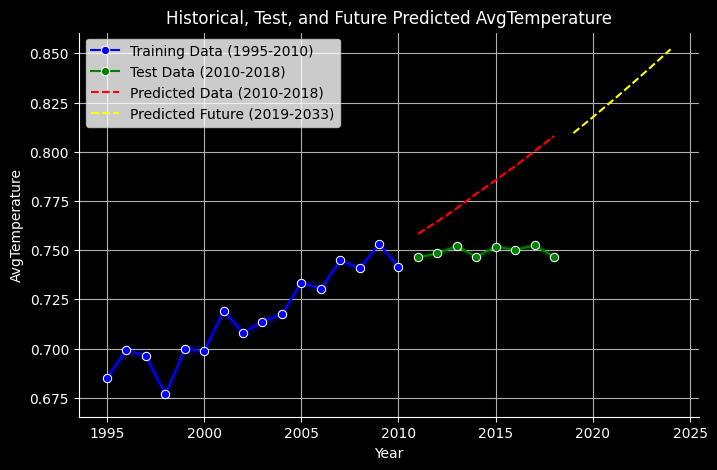

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Data preparation
df = merged_data_copy.copy()

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year information
df['Year'] = df['Date'].dt.year

# Selection of features and target variable
X = df[['Year', 'CO2']]
y = df['AvgTemperature']

# Splitting the data into training and testing sets
train_data = df[(df['Year'] >= 1995) & (df['Year'] <= 2010)]
test_data = df[(df['Year'] > 2010) & (df['Year'] <= 2018)]

X_train = train_data[['Year', 'CO2']]
y_train = train_data['AvgTemperature']

X_test = test_data[['Year', 'CO2']]
y_test = test_data['AvgTemperature']

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Generating predictions for future years (2019-2033)
future_years = pd.DataFrame({
    'Year': np.arange(2019, 2025),
    'CO2': [df['CO2'].mean()] * 6  # Using the average CO2 value
})

# Scale and transform the future years data
future_years_scaled = scaler.transform(future_years)
future_years_poly = poly.transform(future_years_scaled)
future_predictions = model.predict(future_years_poly)

# Adding future predictions to the DataFrame
future_years['Predicted_AvgTemperature'] = future_predictions

# Visualization of results
plt.figure(figsize=(8, 5))

# Current data (historical data)
sns.lineplot(x='Year', y='AvgTemperature', data=train_data, label='Training Data (1995-2010)', color='blue', marker='o')
sns.lineplot(x='Year', y='AvgTemperature', data=test_data, label='Test Data (2010-2018)', color='green', marker='o')

# Test predictions
sns.lineplot(x=X_test['Year'], y=y_pred, label='Predicted Data (2010-2018)', color='red', linestyle='--')

# Future predictions
sns.lineplot(x='Year', y='Predicted_AvgTemperature', data=future_years, label='Predicted Future (2019-2033)', color='yellow', linestyle='--')

plt.title('Historical, Test, and Future Predicted AvgTemperature', color="white")
plt.xlabel('Year', color="white")
plt.ylabel('AvgTemperature', color="white")
plt.gca().tick_params(axis='x', colors='white')  # X-axis ticks color
plt.gca().tick_params(axis='y', colors='white')  # Y-axis ticks color
plt.gca().set_facecolor('black')  
plt.gcf().set_facecolor('black')
plt.gca().spines['bottom'].set_color('white')  # X-axis color
plt.gca().spines['left'].set_color('white')    # Y-axis color
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 0.02415495252129608
R^2 Score: -0.04722578255905274


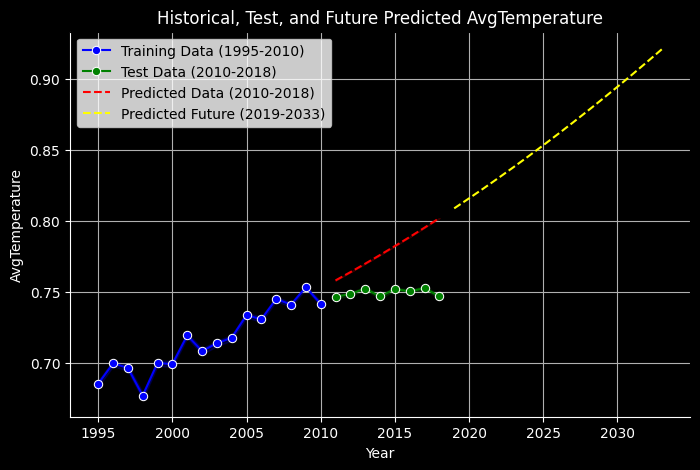

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Data preparation
df = merged_data_copy.copy()

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year information
df['Year'] = df['Date'].dt.year

# Selection of features and target variable
X = df[['Year']]
y = df['AvgTemperature']

# Splitting the data into training and testing sets
train_data = df[(df['Year'] >= 1995) & (df['Year'] <= 2010)]
test_data = df[(df['Year'] > 2010) & (df['Year'] <= 2018)]

X_train = train_data[['Year']]
y_train = train_data['AvgTemperature']

X_test = test_data[['Year']]
y_test = test_data['AvgTemperature']

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Generating predictions for future years (2019-2033)
future_years = pd.DataFrame({
    'Year': np.arange(2019, 2034),
})

# Scale and transform the future years data
future_years_scaled = scaler.transform(future_years)
future_years_poly = poly.transform(future_years_scaled)
future_predictions = model.predict(future_years_poly)

# Adding future predictions to the DataFrame
future_years['Predicted_AvgTemperature'] = future_predictions

# Visualization of results
plt.figure(figsize=(8, 5))

# Current data (historical data)
sns.lineplot(x='Year', y='AvgTemperature', data=train_data, label='Training Data (1995-2010)', color='blue', marker='o')
sns.lineplot(x='Year', y='AvgTemperature', data=test_data, label='Test Data (2010-2018)', color='green', marker='o')

# Test predictions
sns.lineplot(x=X_test['Year'], y=y_pred, label='Predicted Data (2010-2018)', color='red', linestyle='--')

# Future predictions
sns.lineplot(x='Year', y='Predicted_AvgTemperature', data=future_years, label='Predicted Future (2019-2033)', color='yellow', linestyle='--')

plt.title('Historical, Test, and Future Predicted AvgTemperature', color="white")
plt.xlabel('Year', color="white")
plt.ylabel('AvgTemperature', color="white")
plt.gca().tick_params(axis='x', colors='white')  # X-axis ticks color
plt.gca().tick_params(axis='y', colors='white')  # Y-axis ticks color
plt.gca().set_facecolor('black')  
plt.gcf().set_facecolor('black')
plt.gca().spines['bottom'].set_color('white')  # X-axis color
plt.gca().spines['left'].set_color('white')    # Y-axis color
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 0.015507268696083251
R^2 Score: -0.00029065936061800635


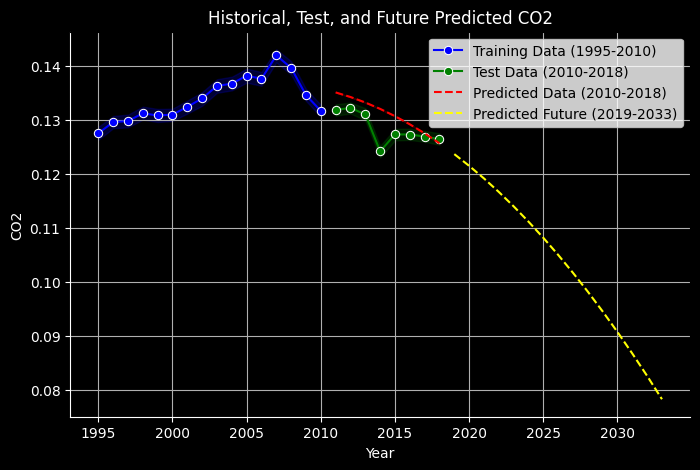

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Data preparation
df = merged_data_copy.copy()

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year information
df['Year'] = df['Date'].dt.year

# Selection of features and target variable
X = df[['Year']]
y = df['CO2']  # Target variable changed to CO2

# Splitting the data into training and testing sets
train_data = df[(df['Year'] >= 1995) & (df['Year'] <= 2010)]
test_data = df[(df['Year'] > 2010) & (df['Year'] <= 2018)]

X_train = train_data[['Year']]
y_train = train_data['CO2']  # Target variable in training set changed to CO2

X_test = test_data[['Year']]
y_test = test_data['CO2']  # Target variable in test set changed to CO2

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Generating predictions for future years (2019-2033)
future_years = pd.DataFrame({
    'Year': np.arange(2019, 2034),
})

# Scale and transform the future years data
future_years_scaled = scaler.transform(future_years)
future_years_poly = poly.transform(future_years_scaled)
future_predictions = model.predict(future_years_poly)

# Adding future predictions to the DataFrame
future_years['Predicted_CO2'] = future_predictions  # Future predictions for CO2

# Visualization of results
plt.figure(figsize=(8, 5))

# Current data (historical data)
sns.lineplot(x='Year', y='CO2', data=train_data, label='Training Data (1995-2010)', color='blue', marker='o')
sns.lineplot(x='Year', y='CO2', data=test_data, label='Test Data (2010-2018)', color='green', marker='o')

# Test predictions
sns.lineplot(x=X_test['Year'], y=y_pred, label='Predicted Data (2010-2018)', color='red', linestyle='--')

# Future predictions
sns.lineplot(x='Year', y='Predicted_CO2', data=future_years, label='Predicted Future (2019-2033)', color='yellow', linestyle='--')

plt.title('Historical, Test, and Future Predicted CO2', color="white")
plt.xlabel('Year', color="white")
plt.ylabel('CO2', color="white")
plt.gca().tick_params(axis='x', colors='white')  # X-axis ticks color
plt.gca().tick_params(axis='y', colors='white')  # Y-axis ticks color
plt.gca().set_facecolor('black')  
plt.gcf().set_facecolor('black')
plt.gca().spines['bottom'].set_color('white')  # X-axis color
plt.gca().spines['left'].set_color('white')    # Y-axis color
plt.legend()
plt.grid(True)
plt.show()

# Data Visualization

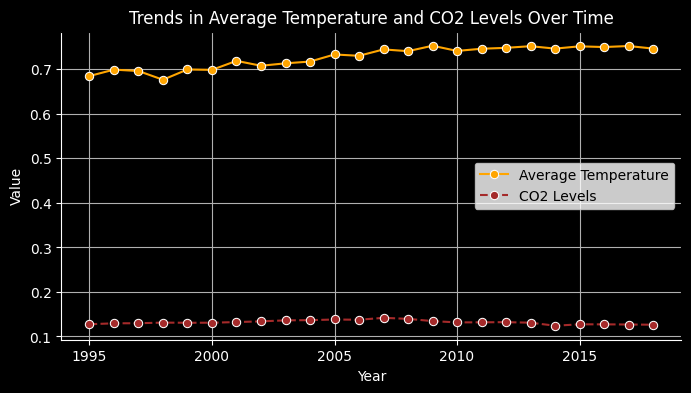

In [107]:
try:
    plt.figure(figsize=(8, 4))

    # Plotting the temperature trend
    sns.lineplot(x=temperature_trend.index, y=temperature_trend.values, marker='o', color='orange', label='Average Temperature')

    # Plotting the CO2 levels trend
    sns.lineplot(x=co2_trend.index, y=co2_trend.values, marker='o', linestyle='--', color='brown', label='CO2 Levels')

    plt.title('Trends in Average Temperature and CO2 Levels Over Time',color='white')
    plt.xlabel('Year',color='white')
    plt.ylabel('Value',color='white')
    plt.legend()
    plt.grid(True)
    plt.gca().tick_params(axis='x', colors='white')  # X-axis ticks color
    plt.gca().tick_params(axis='y', colors='white')  # Y-axis ticks color
    plt.gca().set_facecolor('black')  
    plt.gcf().set_facecolor('black') 
    plt.gca().spines['bottom'].set_color('white')  # X-axis color
    plt.gca().spines['left'].set_color('white')    # Y-axis color
    plt.show()
except KeyboardInterrupt as e:
    print({e})
except Exception as e:
    print(f"An error occurred: {e}")


In [108]:
from geopy.geocoders import Nominatim
import pandas as pd


# Define a function to get the coordinates
geolocator = Nominatim(user_agent="geoapiExercises")

def get_coordinates(region):
    location = geolocator.geocode(region)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Add the coordinates in the DataFrame
max_co2_years[['Latitude', 'Longitude']] = max_co2_years['Region'].apply(lambda x: pd.Series(get_coordinates(x)))

In [141]:
import folium
from IPython.display import display

# Check or remove `NaN` values
max_co2_years = max_co2_years.dropna(subset=['Latitude', 'Longitude'])

# Finding the center coordinates
center_lat = max_co2_years['Latitude'].mean()
center_lon = max_co2_years['Longitude'].mean()

try:
    # Create the map
    m = folium.Map(location=[center_lat, center_lon], zoom_start=6, tiles='cartodb dark_matter')

    # Adding a Map Marker for each region in the DataFrame
    for index, row in max_co2_years.iterrows():
        # Normalize the radius size (e.g., CO2 value divided by 2)
        radius_size = row['CO2'] *5  # Adjust the scaling factor as needed
        
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=radius_size,  # Radius size by CO2 levels
            color='yellow',
            fill=True,
            fill_color='cyan',
            fill_opacity=0.6,
            popup=folium.Popup(
                f"<div style='color: black; font-size: 12px;'>"
                f"<strong>Region:</strong> {row['Region']}<br>"
                f"<strong>Date:</strong> {row['Date']}<br>"
                f"<strong>CO2:</strong> {row['CO2']} ppm"
                "</div>",
                max_width=300
            )
        ).add_to(m)
    
    # Show the map
    display(m)

except KeyboardInterrupt as e:
    print(f"Plotting interrupted by the user: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


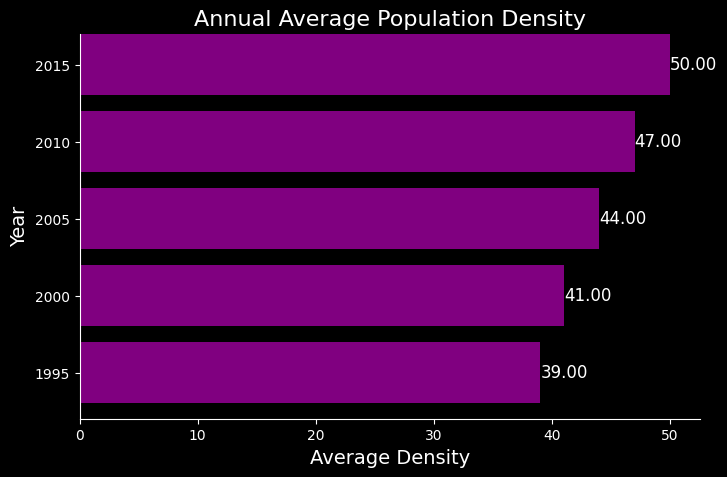

In [110]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Calculate the annual mean density
    annual_mean_density = Df_merged.groupby(Df_merged['Date'].dt.year)['Density'].mean().reset_index()
    annual_mean_density.columns = ['Year', 'Average Density']

    # Create a horizontal bar plot with closer bars by adjusting the bar height and y-axis limits
    plt.figure(figsize=(8, 5))
    bar_height = 0.8  # Adjust the bar height to make them closer
    positions = np.arange(len(annual_mean_density))

    bars = plt.barh(positions, annual_mean_density['Average Density'], color='purple', height=bar_height)

    # Adjust y-axis limits to make bars appear closer
    plt.ylim(-0.6, len(annual_mean_density) - 0.6)
    plt.yticks(positions, annual_mean_density['Year'])

    # Add title and labels
    plt.title('Annual Average Population Density', fontsize=16, color="white")
    plt.xlabel('Average Density', fontsize=14, color="white")
    plt.ylabel('Year', fontsize=14, color="white")

    # Add text on the bars
    for bar in bars:
        width = bar.get_width()  # Get the width of each bar
        plt.text(
            width,  # Position of text
            bar.get_y() + bar.get_height() / 2,  # Centered vertically
            f'{width:.2f}',  # Text value with 2 decimal places
            va='center',  # Vertical alignment
            ha='left',  # Horizontal alignment
            color='white',  # Text color
            fontsize=12  # Text font size
        )

    # Set tick colors
    plt.gca().tick_params(axis='x', colors='white')  # X-axis ticks color
    plt.gca().tick_params(axis='y', colors='white')  # Y-axis ticks color

    # Set background color
    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')

    # Set spine colors
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('white')  # Color of the axes' border

    # Hide the right and top spines
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    # Display the plot
    plt.show()
except KeyboardInterrupt as e:
    print(f"Plotting interrupted by the user: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


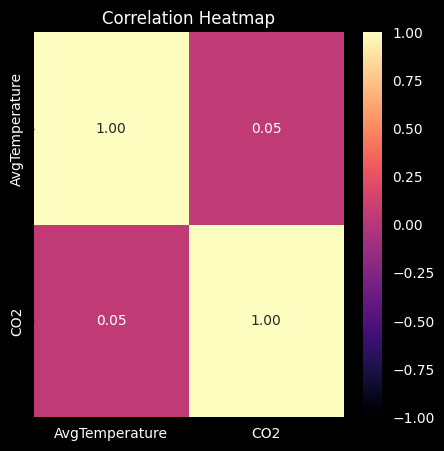

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(5, 5))
    z = sns.heatmap(correlation1, 
                    annot=True, 
                    cmap='magma', 
                    vmin=-1, 
                    vmax=1, 
                    fmt='.2f')  # Change font size and color here
    
    plt.title('Correlation Heatmap', color='white')
    plt.gca().set_facecolor('black')  
    plt.gcf().set_facecolor('black')  # Make sure background is set correctly
    
    # Customize x and y axis tick labels color
    z.set_xticklabels(z.get_xticklabels(), color='white')  # X-axis labels
    z.set_yticklabels(z.get_yticklabels(), color='white')  # Y-axis labels
    
    # Customize colorbar
    colorbar = z.collections[0].colorbar
    colorbar.ax.tick_params(labelcolor='white')  # Colorbar tick labels color
    colorbar.ax.set_facecolor('black')  # Colorbar background color
    
    # Display the plot
    plt.show()

except KeyboardInterrupt as e:
    print(f"Plotting interrupted by the user: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


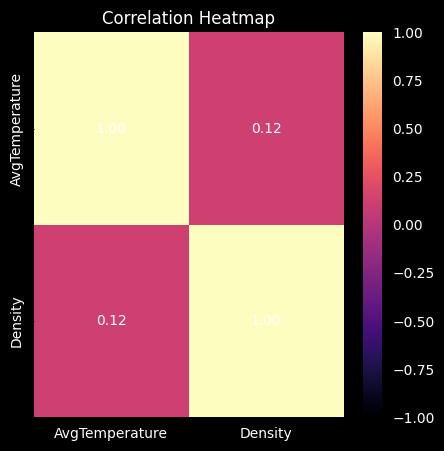

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(5,5))
    z=sns.heatmap(correlation2, annot=True, cmap='magma', vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 10, "color": "white"})
    plt.title('Correlation Heatmap',color="white")
    plt.gca().set_facecolor('black')  
    plt.gcf().set_facecolor('black') # Make sure background is set correctly
    # Customize x and y axis tick labels color
    # Customize colorbar
    colorbar = z.collections[0].colorbar
    colorbar.ax.tick_params(labelcolor='white')  # Colorbar tick labels color
    z.set_xticklabels(z.get_xticklabels(), color='white')  # X-axis labels
    z.set_yticklabels(z.get_yticklabels(), color='white')  # Y-axis labels
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

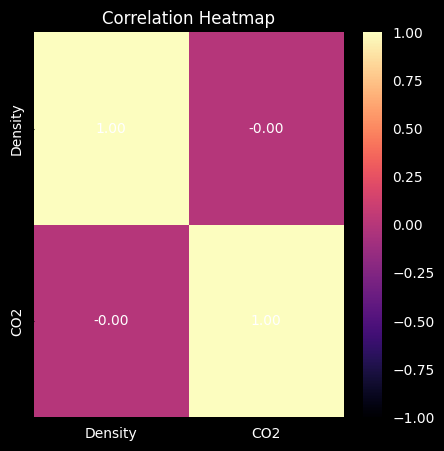

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(5,5))
    z=sns.heatmap(correlation3, annot=True, cmap='magma', vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 10, "color": "white"})
    plt.title('Correlation Heatmap',color="white")
    plt.gca().set_facecolor('black')  
    plt.gcf().set_facecolor('black') # Make sure background is set correctly
    # Customize x and y axis tick labels color
    # Customize colorbar
    colorbar = z.collections[0].colorbar
    colorbar.ax.tick_params(labelcolor='white')  # Colorbar tick labels color
    z.set_xticklabels(z.get_xticklabels(), color='white')  # X-axis labels
    z.set_yticklabels(z.get_yticklabels(), color='white')  # Y-axis labels
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

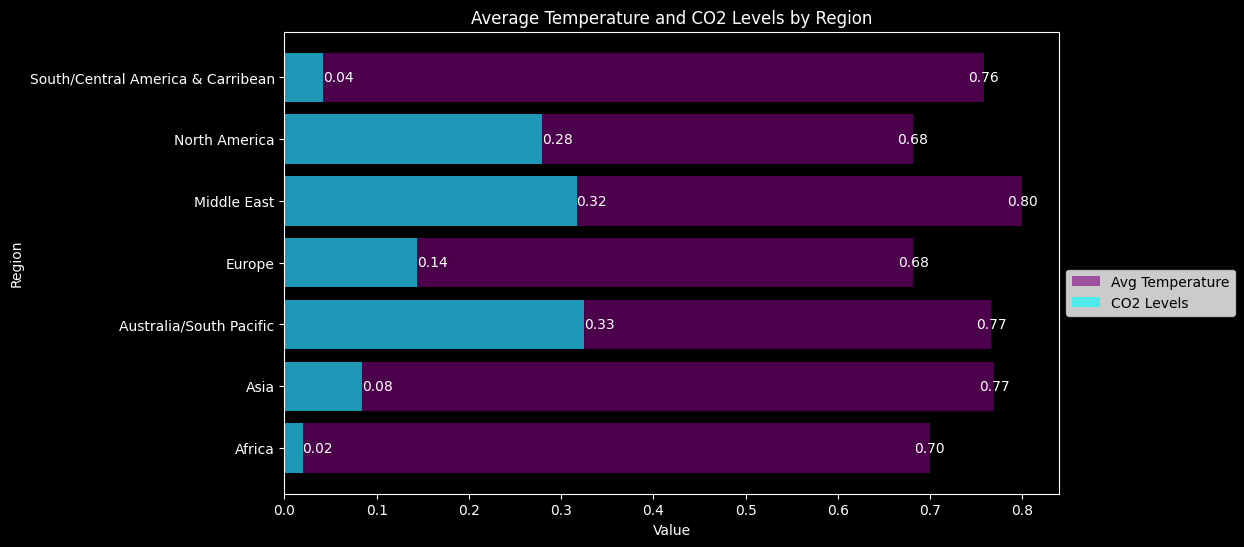

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Create a figure and axis
    plt.figure(figsize=(10, 6))

    # Plot average temperature by country (horizontal bar chart)
    bars1 = plt.barh(
        country_analysis.index, 
        country_analysis['AvgTemperature'], 
        color='purple', 
        label='Avg Temperature', 
        alpha=0.6
    )

    # Add text on the bars for AvgTemperature
    for bar in bars1:
        width = bar.get_width()
        plt.text(
            width, 
            bar.get_y() + bar.get_height() / 2, 
            f"{width:.2f}", 
            color='white', 
            va='center', 
            ha='center'
        )

    # Plot CO2 levels by country (horizontal bar chart)
    bars2 = plt.barh(
        country_analysis.index, 
        country_analysis['CO2'], 
        color='cyan', 
        label='CO2 Levels', 
        alpha=0.6
    )

    # Add text on the bars for CO2
    for bar in bars2:
        width = bar.get_width()
        plt.text(
            width, 
            bar.get_y() + bar.get_height() / 2, 
            f"{width:.2f}", 
            color='white', 
            va='center', 
            ha='left'
        )

    # Add title and labels
    plt.title('Average Temperature and CO2 Levels by Region', color='white')
    plt.xlabel('Value', color='white')
    plt.ylabel('Region', color='white')

    # Adjust legend position
    plt.legend(loc='best', bbox_to_anchor=(1, 0.5), frameon=True)

    # Customize background color
    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')
    plt.gca().tick_params(axis='x', colors='white')  # X-axis ticks color
    plt.gca().tick_params(axis='y', colors='white')  # Y-axis ticks color
    plt.gca().spines['top'].set_color('white')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['bottom'].set_color('white')
    plt.gca().spines['left'].set_color('white')

    # Display the plot
    plt.show()

except KeyboardInterrupt as e:
    print(f"Plotting interrupted by the user: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


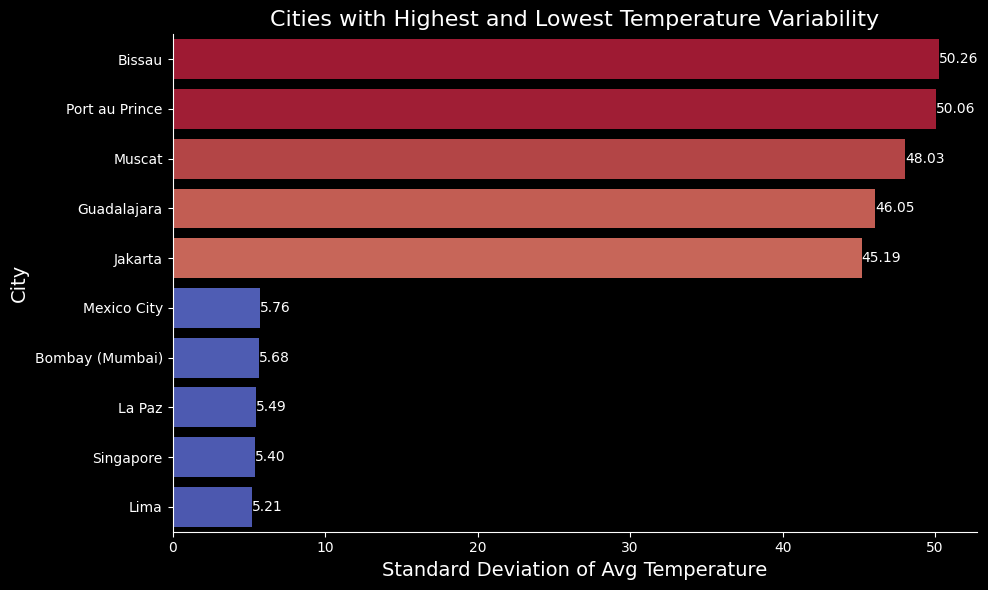

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

try:
    # Define a color palette based on the temperature values
    def dynamic_palette(values):
        # Normalize the values to range from 0 to 1
        norm = plt.Normalize(values.min(), values.max())
        # Map the normalized values to the coolwarm color map
        cmap = plt.get_cmap('coolwarm')
        # Create a list of colors for each value
        colors = [cmap(norm(val)) for val in values]
        # Convert colors to a list of hex strings
        hex_colors = [mcolors.to_hex(color) for color in colors]
        return hex_colors

    # Create a horizontal bar plot with hue
    plt.figure(figsize=(10, 6))
    bars = sns.barplot(
        data=top_bottom_cities,
        y='City',  # y-axis: City (index)
        x='AvgTemperature',  # x-axis: AvgTemperature
        hue='City',  # Assign x variable to hue
        palette=dynamic_palette(top_bottom_cities['AvgTemperature']),
        dodge=False
    )
    
    # Add text on the bars for AvgTemperature
    for bar in bars.patches:
        width = bar.get_width()
        bars.text(
            width, 
            bar.get_y() + bar.get_height() / 2, 
            f"{width:.2f}", 
            color='white', 
            va='center', 
            ha='left'
        )

    # Title and labels
    plt.title('Cities with Highest and Lowest Temperature Variability', fontsize=16, color='white')
    plt.xlabel('Standard Deviation of Avg Temperature', fontsize=14, color='white')
    plt.ylabel('City', fontsize=14, color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')

    # Background colors
    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')
    plt.gca().tick_params(axis='x', colors='white')  # X-axis ticks color
    plt.gca().tick_params(axis='y', colors='white')  # Y-axis ticks color
    plt.tight_layout()
    
    # Set axis line colors to white
    plt.gca().spines['top'].set_color('white')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['bottom'].set_color('white')
    plt.gca().spines['left'].set_color('white')

    # Hide the right and top spines
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    plt.show()

except KeyboardInterrupt as e:
    print(f"Plotting interrupted by the user: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


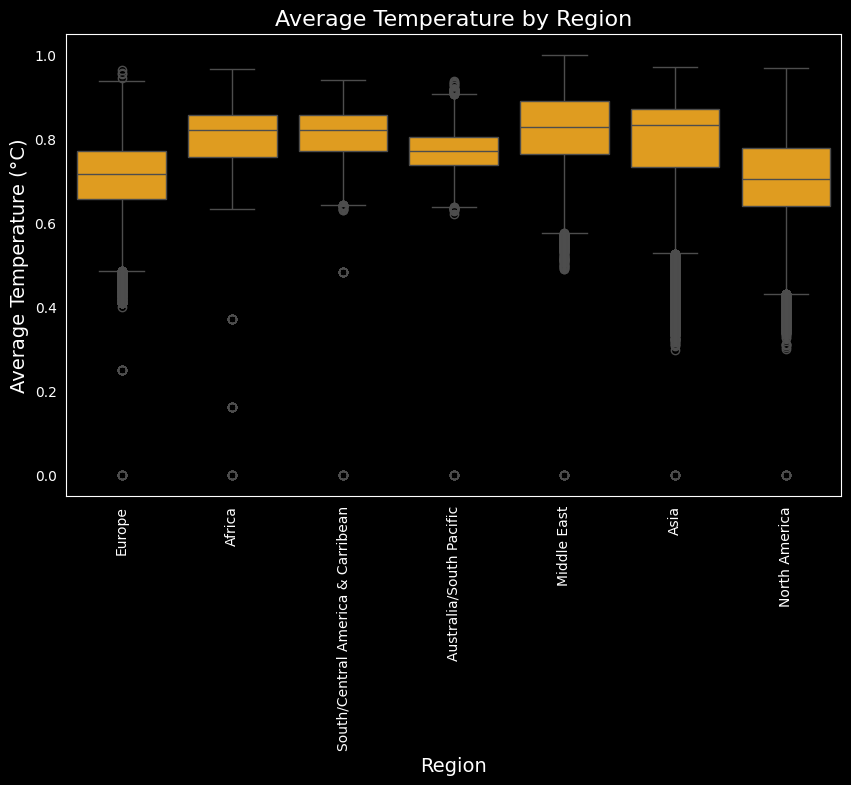

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Plotting the boxplot for temperature across regions
    plt.figure(figsize=(10, 6))

    # Create a boxplot
    sns.boxplot(x='Region', y='AvgTemperature', data=merged_data_copy, color='orange')

    # Add a title and labels
    plt.title('Average Temperature by Region', fontsize=16, color='white')
    plt.xlabel('Region', fontsize=14, color='white')
    plt.ylabel('Average Temperature (°C)', fontsize=14, color='white')

    # Customize the appearance
    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')

    # Set tick label colors and rotate the x-axis labels
    plt.xticks(color='white', rotation=90)  # Rotate x-axis labels to vertical
    plt.yticks(color='white')  # Ensure y-axis tick labels are white

    # Set axis line colors to white
    plt.gca().spines['top'].set_color('white')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['bottom'].set_color('white')
    plt.gca().spines['left'].set_color('white')

    plt.grid(False)
    # Display the plot
    plt.show()

except KeyboardInterrupt as e:
    print(f"Plotting interrupted by the user: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

In [117]:
from geopy.geocoders import Nominatim
import pandas as pd

# Geodata retrieval function with `geopy'
def get_coordinates(city_name):
    geolocator = Nominatim(user_agent="city_coordinates")
    location = geolocator.geocode(city_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None


# Add coordinates
city_classification[['Latitude', 'Longitude']] = city_classification['City'].apply(lambda city: pd.Series(get_coordinates(city)))



In [118]:
import pandas as pd

# Check for NaN values
print(city_classification[['Latitude', 'Longitude']].isna().sum())

# Remove rows with NaN values
city_classification_clean = city_classification.dropna(subset=['Latitude', 'Longitude'])


Latitude     1
Longitude    1
dtype: int64


In [119]:
import folium
from IPython.display import display

# Define the color map for categories
color_map = {
    'High': 'darkred',
    'Medium-High': 'red',
    'Medium': 'orange',
    'Medium-Low': 'lightgreen',
    'Low': 'green'
}

# Center of the map based on the mean latitude and longitude
map_center = [city_classification_clean['Latitude'].mean(), city_classification_clean['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# Add markers to the map for each city
for _, row in city_classification_clean.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']}<br>Climate Change: {row['Climate Change']}",
        icon=folium.Icon(color=color_map[row['Climate Change']])
    ).add_to(m)

# Add a legend to the map
legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: 150px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color: white;
                padding: 10px;">
        <b>Climate Change</b><br>
        <i style="background: darkred; width: 20px; height: 20px; display: inline-block; border-radius: 50%;"></i> High<br>
        <i style="background: red; width: 20px; height: 20px; display: inline-block; border-radius: 50%;"></i> Medium-High<br>
        <i style="background: orange; width: 20px; height: 20px; display: inline-block; border-radius: 50%;"></i> Medium<br>
        <i style="background: lightgreen; width: 20px; height: 20px; display: inline-block; border-radius: 50%;"></i> Medium-Low<br>
        <i style="background: green; width: 20px; height: 20px; display: inline-block; border-radius: 50%;"></i> Low
    </div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
display(m)

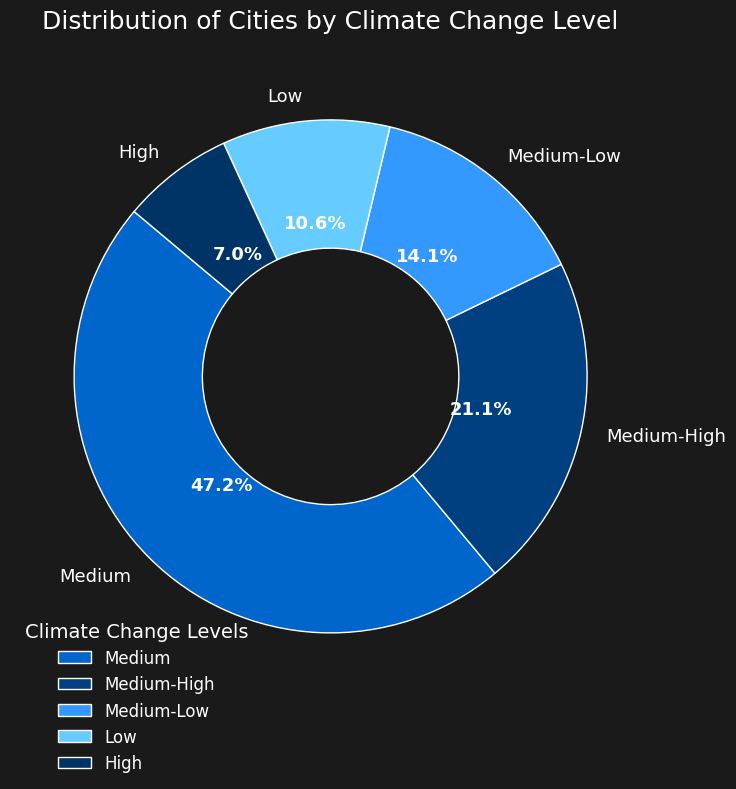

In [138]:
import matplotlib.pyplot as plt

# Climate change levels count
level_counts = city_classification_clean['Climate Change'].value_counts()

# Define a color map with more vibrant and visually appealing colors
color_map = {
    'High': '#003366',        # Dark Blue
    'Medium-High': '#004080', # Medium Dark Blue
    'Medium': '#0066cc',      # Medium Blue
    'Medium-Low': '#3399ff',  # Light Blue
    'Low': '#66ccff'          # Very Light Blue
}

# Check if all level_counts index are in the color_map
missing_levels = [level for level in level_counts.index if level not in color_map]
if missing_levels:
    raise ValueError(f"Missing colors for levels: {missing_levels}")

# Plotting the pie chart
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    level_counts,
    labels=level_counts.index,
    autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',  # Display percentage only for non-zero wedges
    colors=[color_map[level] for level in level_counts.index],
    startangle=140,
    wedgeprops=dict(width=0.5, edgecolor='white')  # Adjust width and add edgecolor for separation
)

# Adding a legend
legend = plt.legend(
    wedges,
    level_counts.index,
    title="Climate Change Levels",
    title_fontsize='14',
    loc="center left",
    bbox_to_anchor=(0,0,0,0),
    frameon=False,  # Remove legend box frame
    fontsize=12
)

# Customize legend title and text color
legend.get_title().set_color("white")  # Set legend title color to white
for text in legend.get_texts():
    text.set_color("white")

# Adding a title and customizing the appearance
plt.title('Distribution of Cities by Climate Change Level', color='white', fontsize=18, pad=20)
plt.gca().set_facecolor('#1a1a1a')
plt.gcf().set_facecolor('#1a1a1a')

# Customize the appearance of pie chart text
for text in texts:
    text.set_color('white')
    text.set_fontsize(13)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')  # Make percentage text bold
    autotext.set_horizontalalignment('center')

plt.tight_layout()
plt.show()
